# Environment Impact of Food Production Analysis Project

### Project Roadmap (CRISP-DM)
* Business Understanding – Define objectives, hypothesis, and key questions.
* Data Understanding – Load and inspect the dataset.
* Data Preparation – Handle missing values, clean the dataset, and prepare features.
* Exploratory Data Analysis (EDA) – Visualize key trends in carbon emissions, water use, and land use.
* Feature Engineering – Create new insights from the existing data.
* Modeling – Identify patterns and develop predictive insights.
* Evaluation & Recommendations – Provide sustainability recommendations.

## Business Understanding 

Objective
* This project analyzes the environmental impact of food production, focusing on key metrics like:
1. Carbon emissions
2. Water usage
3. Land use
4. Biodiversity loss

The goal is to uncover trends and provide sustainability recommendations.

*Key Business Questions*
1. Which food products have the highest environmental impact?
2. How do plant-based vs. animal-based foods compare in sustainability?
3. What are the key drivers of high carbon emissions and resource consumption?
4. What recommendations can be made for a more sustainable food system?

*Hypothesis*
1. Animal-based food production has a significantly higher environmental impact than plant-based food production.
2. Regions with high food production output tend to have greater land and water use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import missingno as msno
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import KMeans




print("All packages installed successfully!")

All packages installed successfully!


In [2]:
# Load the dataset
csv_path = "Food_Production.csv"
df = pd.read_csv(csv_path)

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

(None,
           Food product  Land use change  Animal Feed  Farm  Processing  \
 0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
 1         Maize (Meal)              0.3          0.0   0.5         0.1   
 2        Barley (Beer)              0.0          0.0   0.2         0.1   
 3              Oatmeal              0.0          0.0   1.4         0.0   
 4                 Rice              0.0          0.0   3.6         0.1   
 
    Transport  Packging  Retail  Total_emissions  \
 0        0.1       0.1     0.1              1.4   
 1        0.1       0.1     0.0              1.1   
 2        0.0       0.5     0.3              1.1   
 3        0.1       0.1     0.0              1.6   
 4        0.1       0.1     0.1              4.0   
 
    Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  ...  \
 0                                                NaN         ...   
 1                                                NaN         ...   
 2                  

## Data Cleaning 

*Observations*
1. Missing Values: Some columns have missing values (e.g., "Eutrophying emissions per 1000kcal").
2. Units Are Different: Some metrics are per kilogram, while others are per kcal or per 100g protein.
3. Possible Outliers: Some values (e.g., water use) appear very high.

*Action Plan*
* Handle missing values (drop or impute where necessary).
* Standardize units for easier comparison.
* Check for outliers in critical columns.

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  13
Freshwater withdrawals per 100g protein (liters per 100g protein)          17
Freshwater withdrawals per kilogram (liters per kilogram)                   5
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               10
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       16
Land use per 1000kcal (m² per 1000kcal)                                    10
Land use per kilogram (m² per kilogram)                                     5
Land use per 100g protein (m² per 100g protein)                            16
Scarcity-weighted water use per kilogram (liters per kilogram)              5
Scarcity-weighted water use per 100g protein (liters per 100g pr

In [4]:
# Get summary statistics
df.describe()


,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327272,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


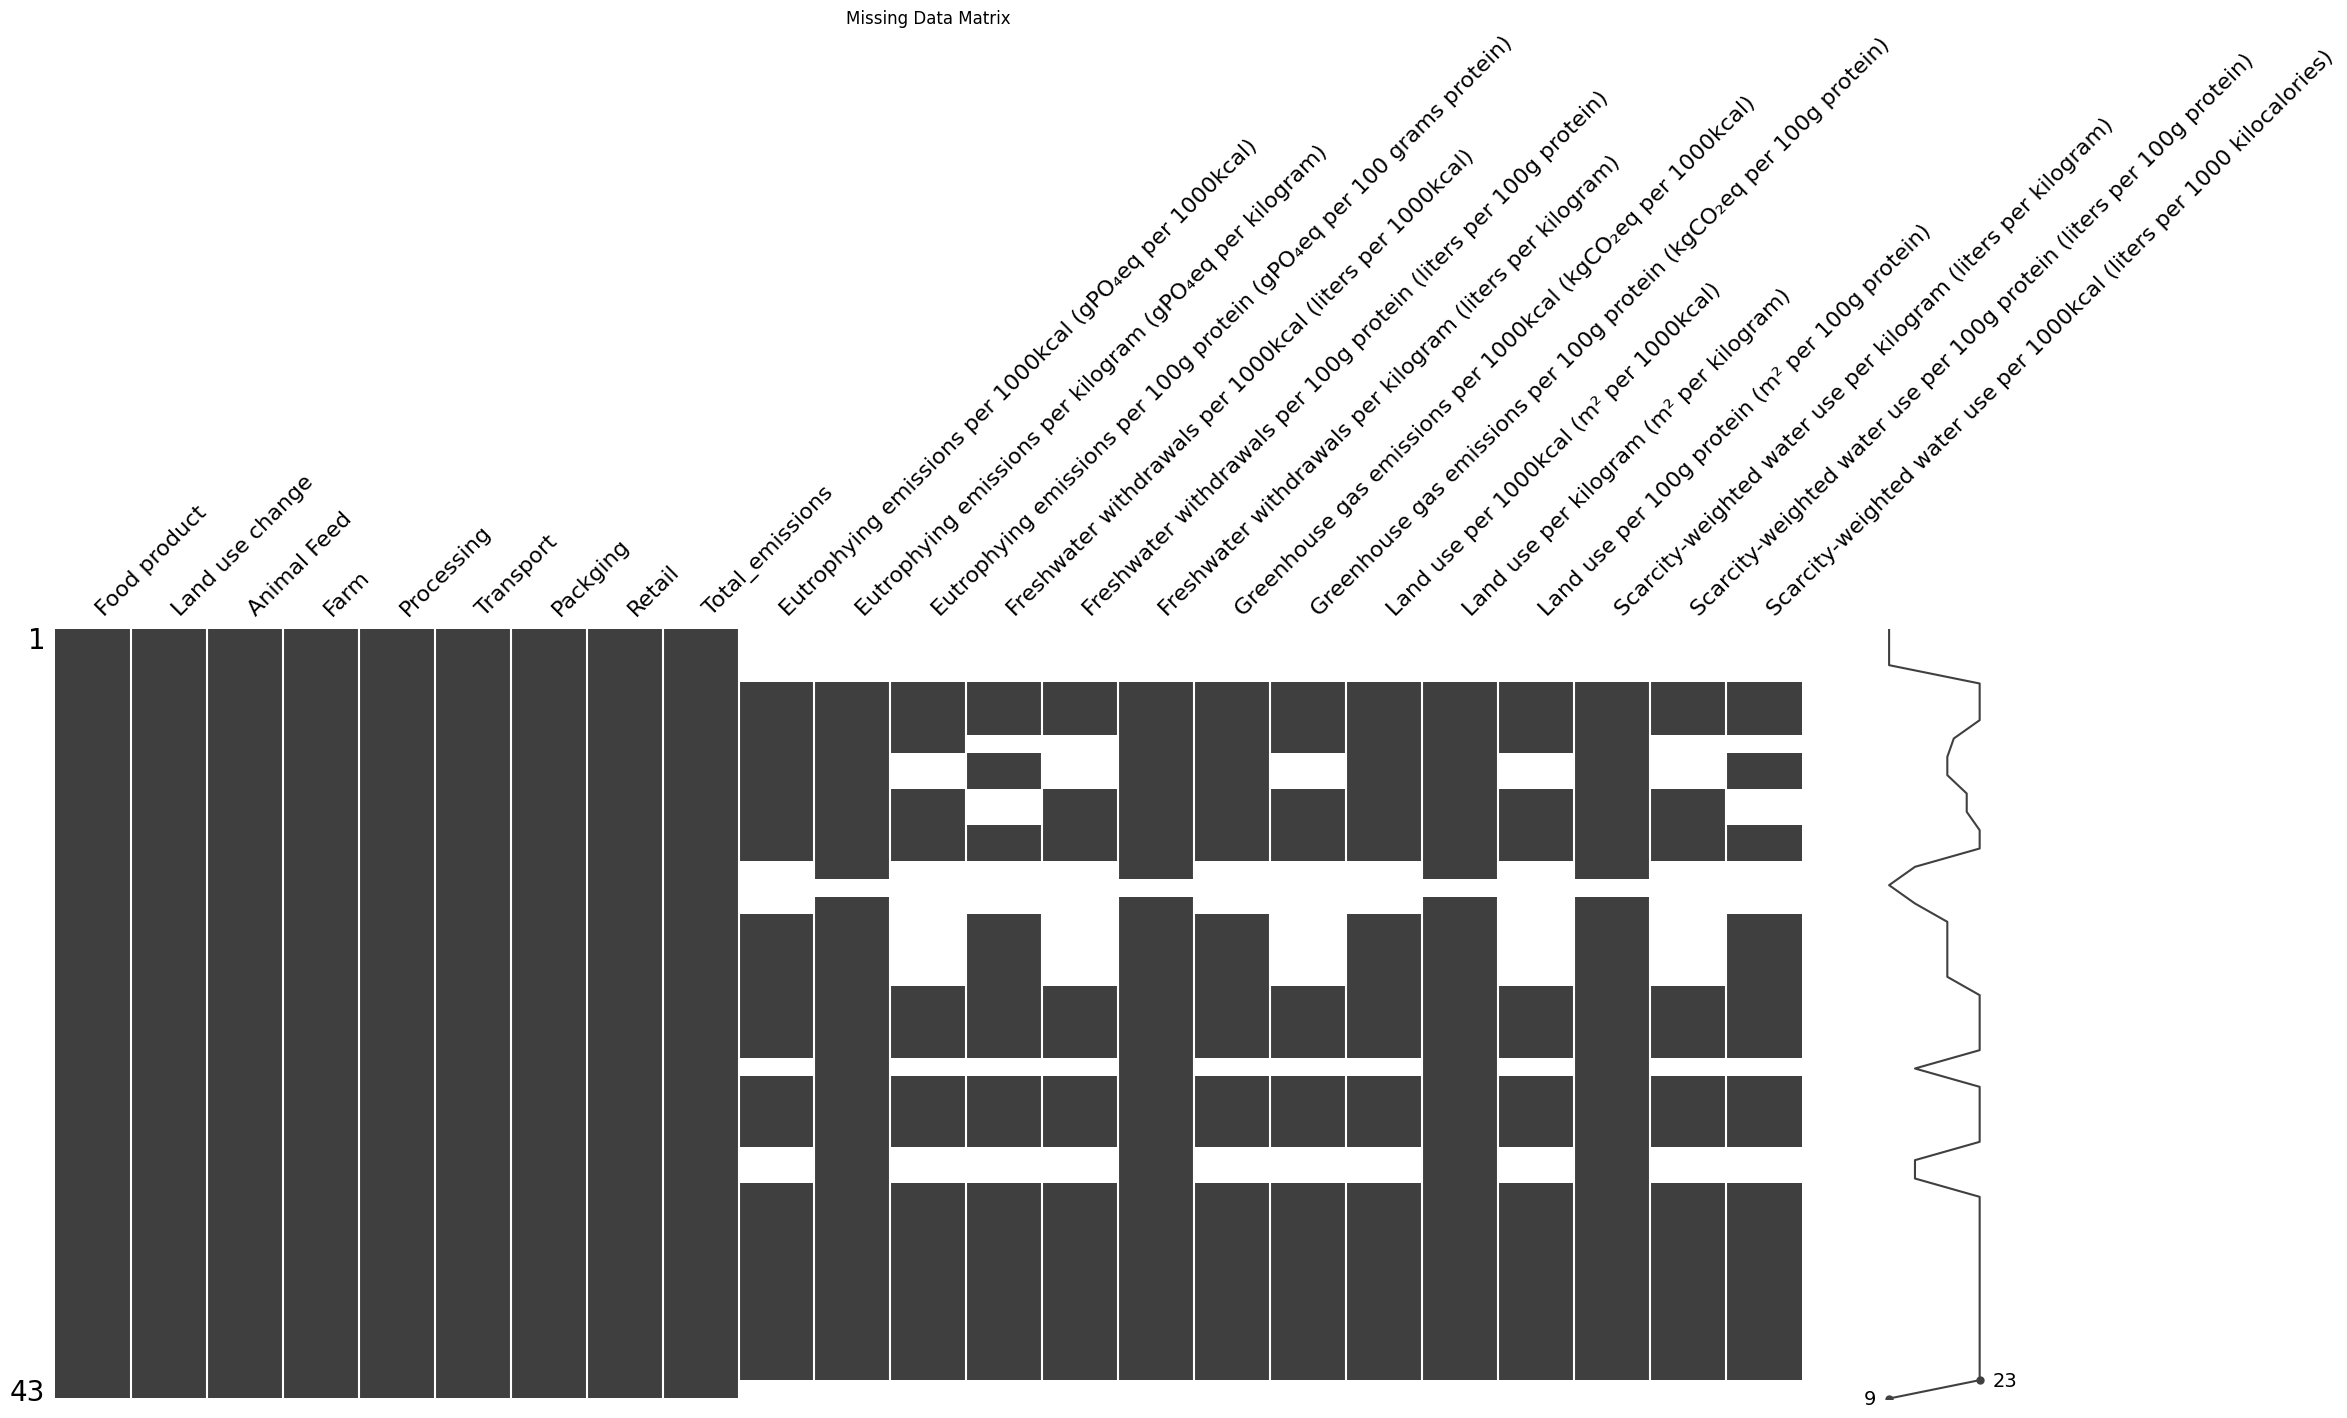

In [5]:
# Missing values matrix
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

Check for Outliers to use Mean or Median to fill missing values

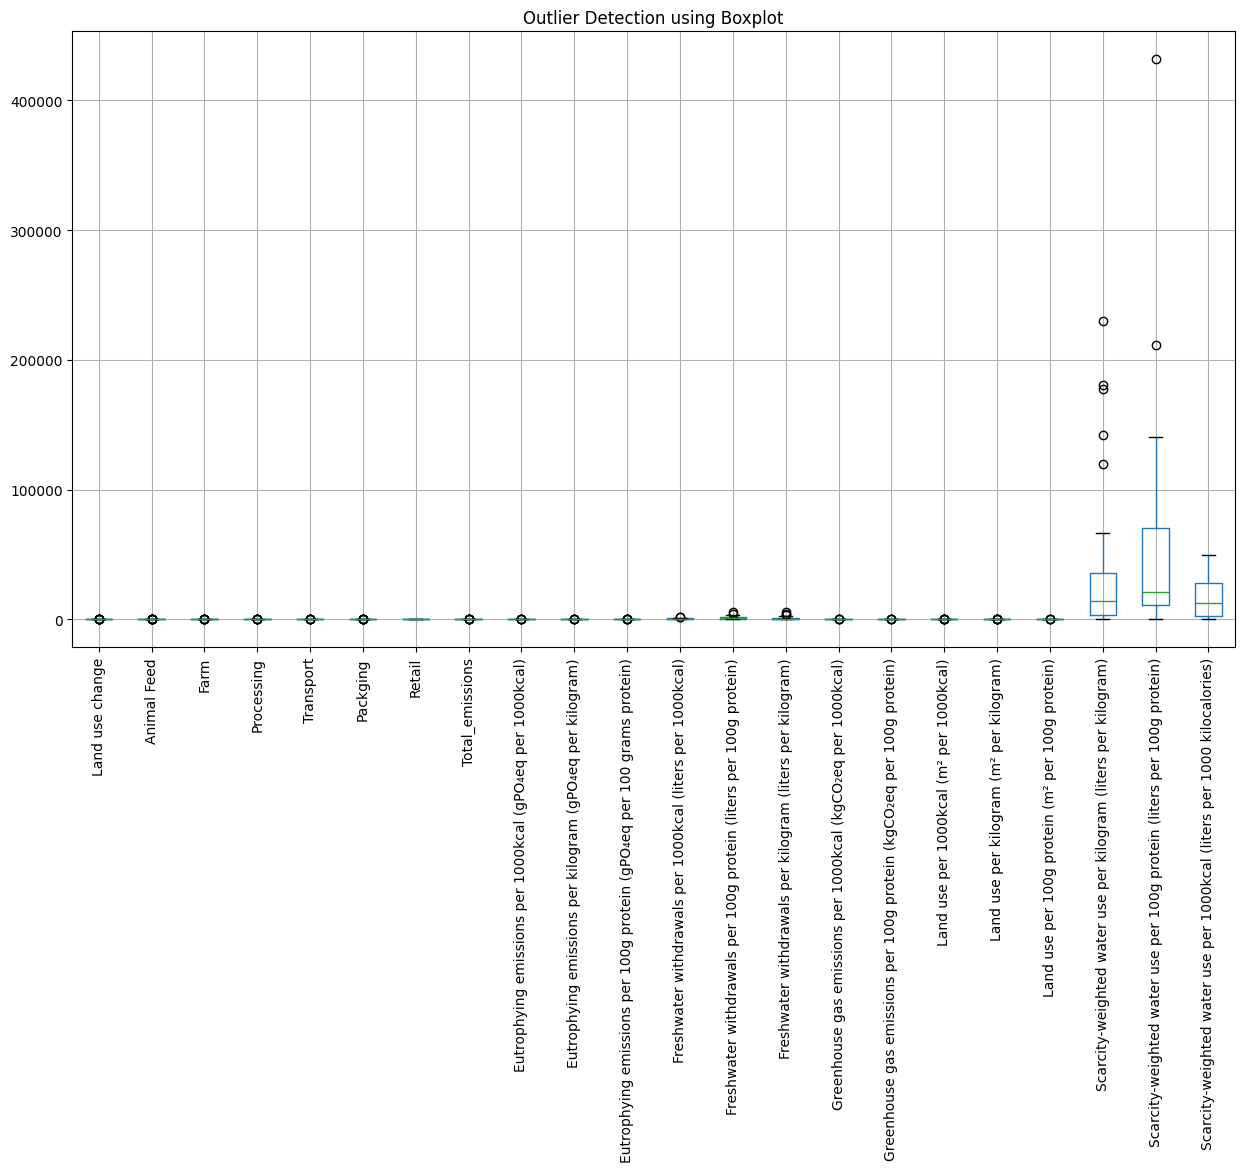

Land use change                                                            8
Animal Feed                                                               10
Farm                                                                       6
Processing                                                                 5
Transport                                                                  5
Packging                                                                   7
Total_emissions                                                            6
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   4
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   4
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      4
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  2
Freshwater withdrawals per 100g protein (liters per 100g protein)          2
Freshwater withdrawals per kilogram (liters per kilogram)                  3

In [6]:
# Select only numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=90)
plt.title("Outlier Detection using Boxplot")
plt.show()

# IQR Method to detect outliers
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Outliers: Any value < Q1 - 1.5*IQR or > Q3 + 1.5*IQR
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))

# Count outliers per column
outlier_counts = outliers.sum()
outlier_counts[outlier_counts > 0]

Land use per kilogram (m² per kilogram)                                    3.862069
Farm                                                                       3.721835
Land use change                                                            3.689864
Total_emissions                                                            3.618267
Land use per 1000kcal (m² per 1000kcal)                                    3.434621
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               3.362409
Scarcity-weighted water use per 100g protein (liters per 100g protein)     3.230308
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       3.119120
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   2.762100
Land use per 100g protein (m² per 100g protein)                            2.526165
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   2.524743
Scarcity-weighted water use per kilogram (liters per kilogram)             2

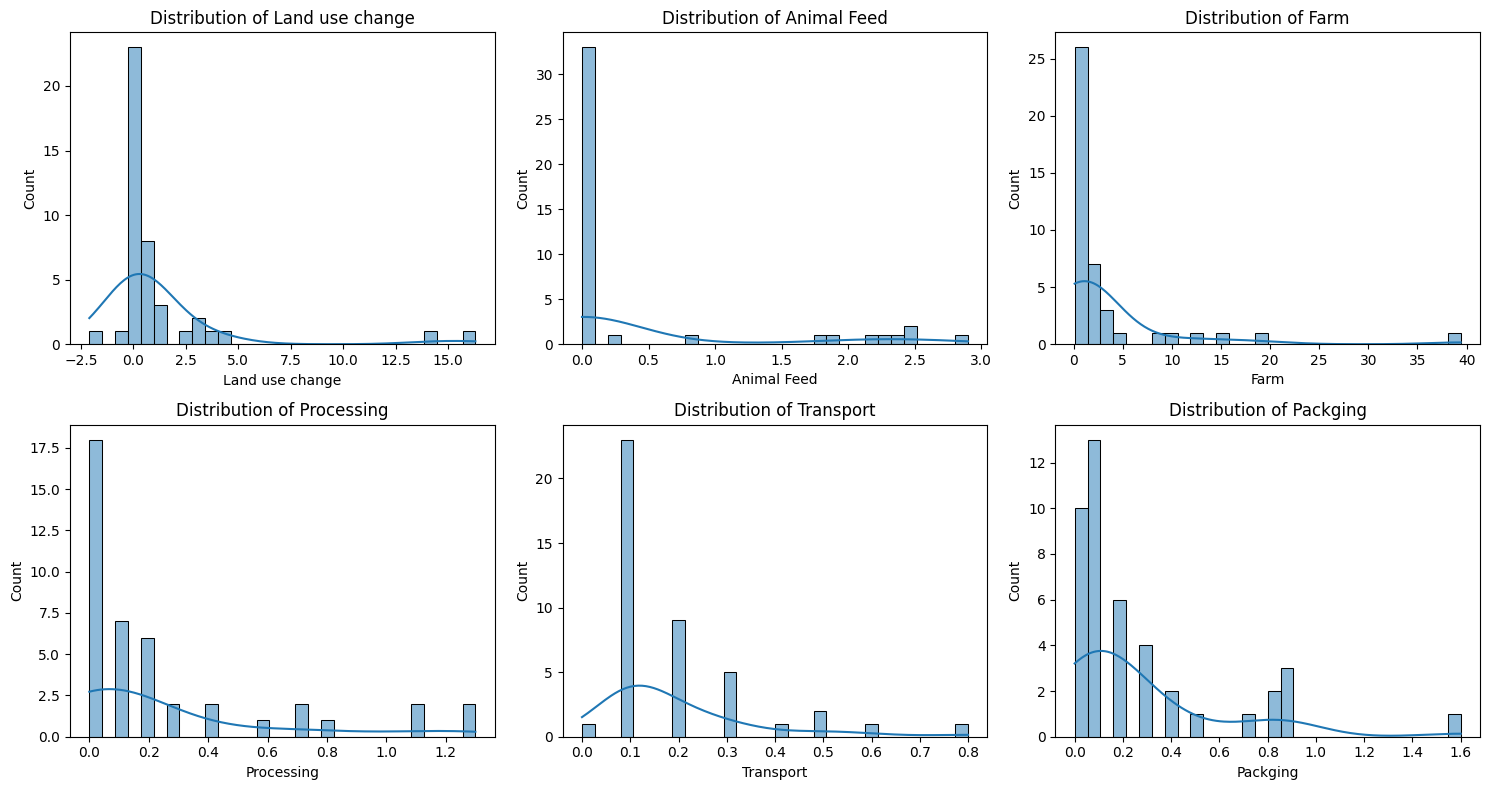

In [7]:
# Calculate skewness for each numerical column
skewness = df[num_cols].skew().sort_values(ascending=False)
print(skewness)

# Visualize distributions
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols[:6]):  # Checking first 6 columns
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [8]:
# Identify numeric columns only
numeric_cols = df.select_dtypes(include=["number"]).columns

# Fill missing values in numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify that missing values are handled
df.isnull().sum().sum()  # Should return 0 if all missing values are fixed

0

In [9]:
# Define threshold for missing values (30%)
threshold = 30  

# Calculate the percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# Drop columns with more than 30% missing values
cols_to_drop = missing_values[missing_values > threshold].index
df_cleaned = df.drop(columns=cols_to_drop)

# Select only numeric columns for filling NaN with median
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# Verify missing values have been handled
print(df_cleaned.isnull().sum())  # Should print 0 for all columns if handled correctly

Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  0

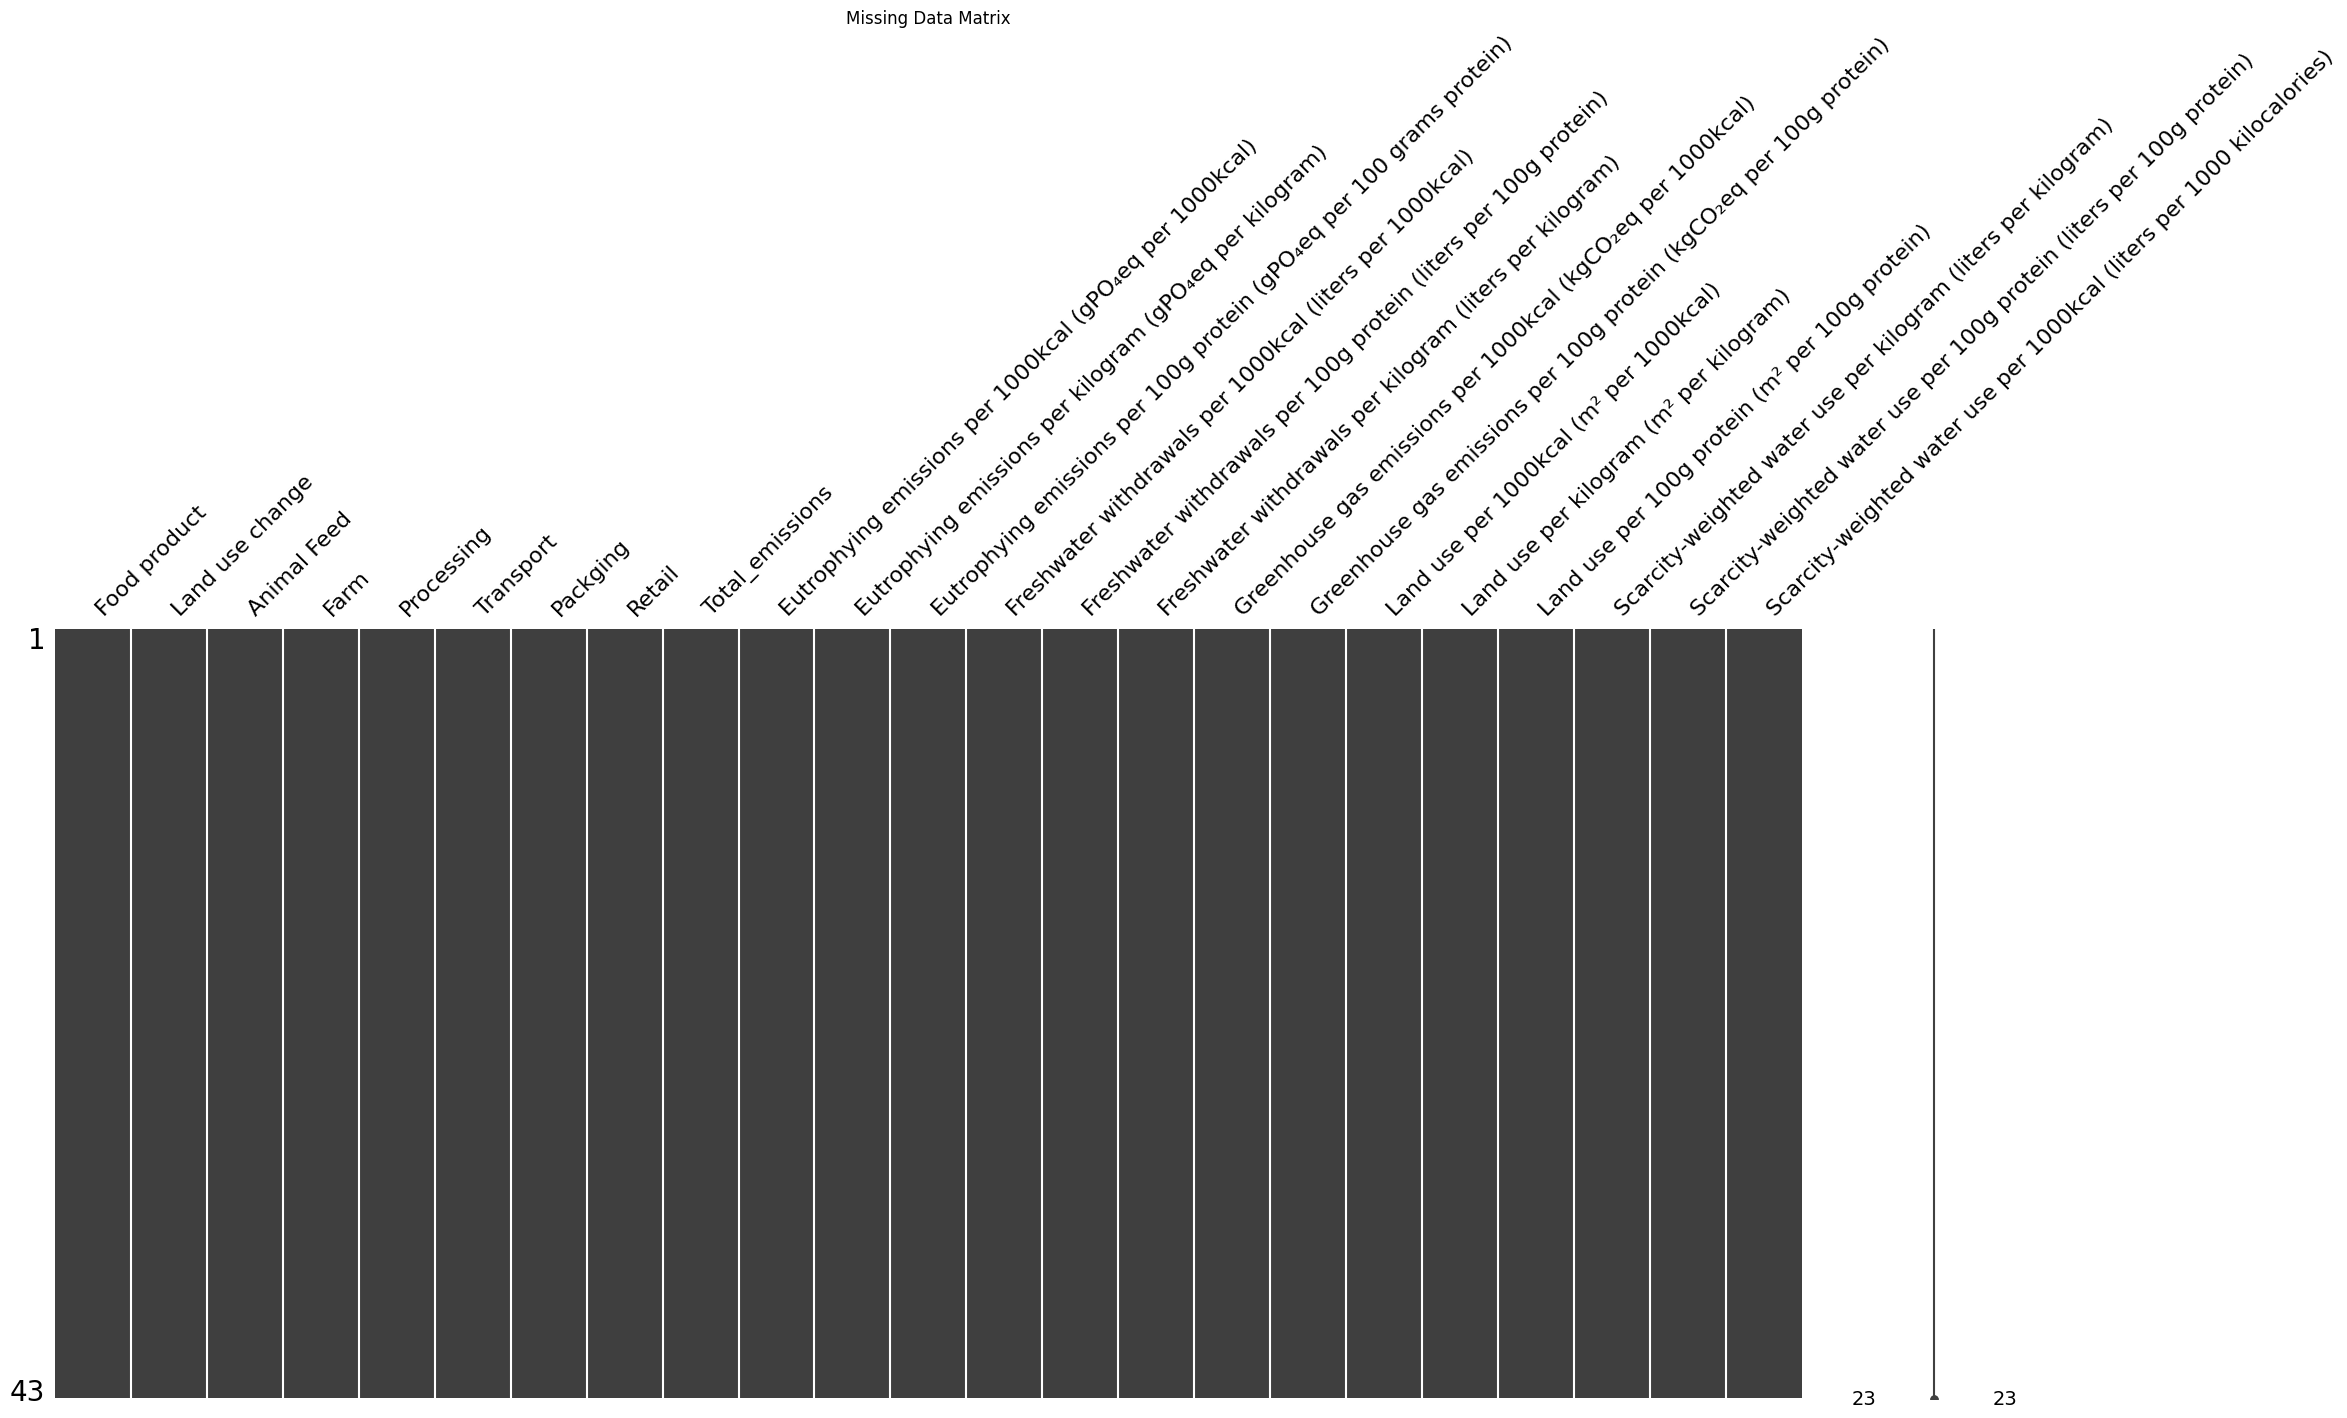

In [10]:
# Missing values matrix
msno.matrix(df)
plt.title("Missing Data Matrix")
plt.show()

## Exploratory Data Analysis (EDA)

*Key Visualizations*
* Top 10 foods with the highest carbon emissions
* Comparison of plant-based vs. animal-based food impacts
* Correlation between different environmental factors

### Univariate Analysis

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


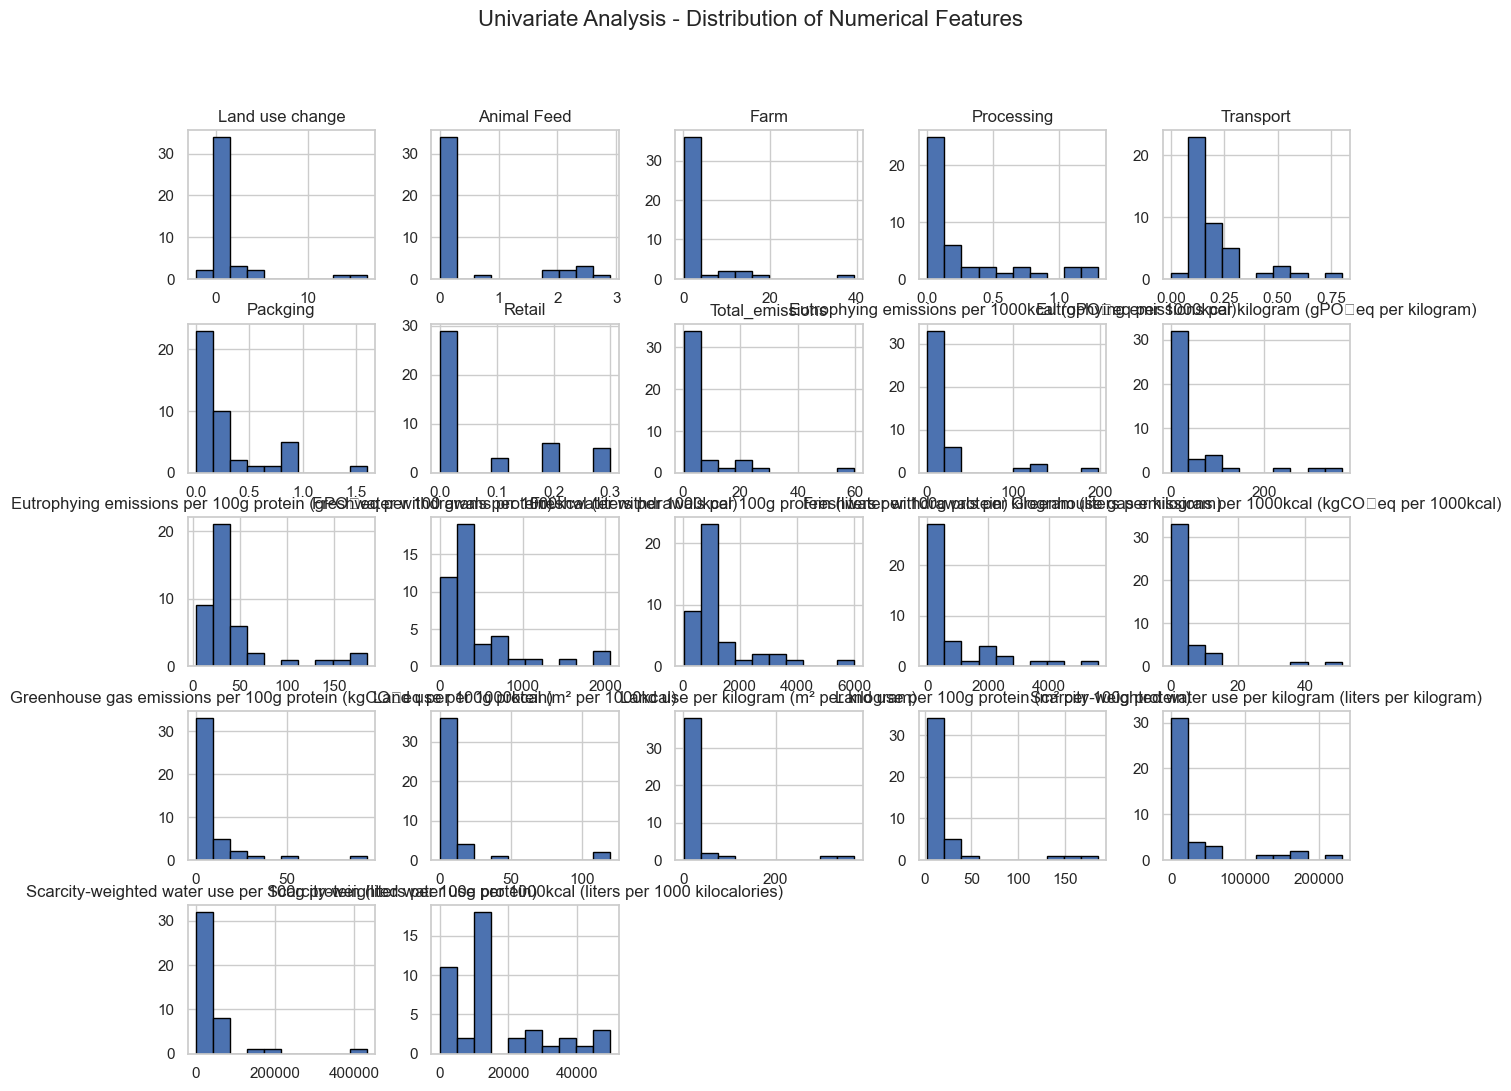

In [11]:
# Set plot style
sns.set(style="whitegrid")

# Select numerical columns for analysis
numeric_cols = df.select_dtypes(include=['float64']).columns

# Plot histograms for numerical columns (Univariate Analysis)
df[numeric_cols].hist(figsize=(15, 12), bins=10, edgecolor='black')
plt.suptitle("Univariate Analysis - Distribution of Numerical Features", fontsize=16)
plt.show()

Univariate Analysis Observations:
* Many variables have right-skewed distributions, meaning a few food products contribute significantly higher values.

* Total emissions, Freshwater withdrawals, and Scarcity-weighted water use have extreme values, likely driven by certain food products.

* Some features have values concentrated near zero, indicating minimal impact for certain foods

Distribution of Carbon Emissions

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


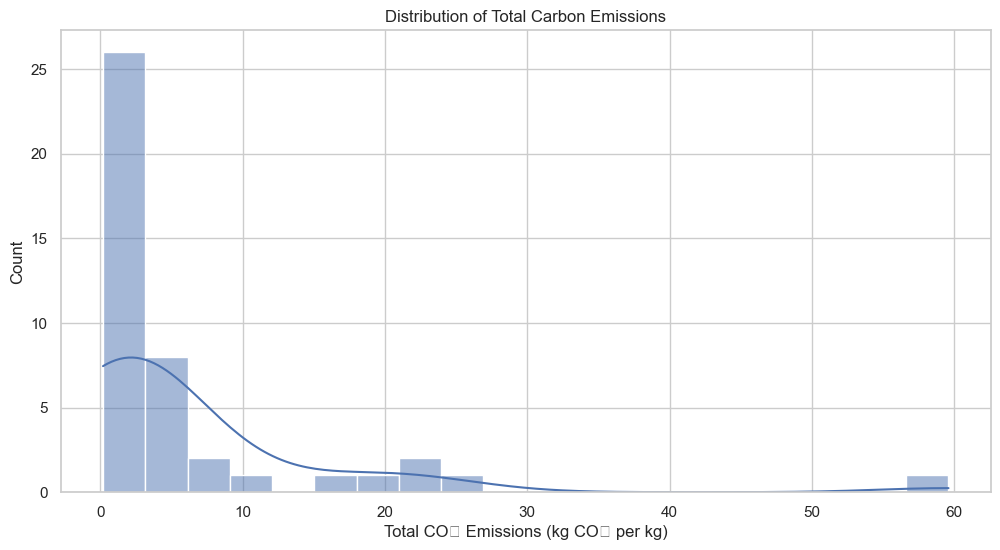

In [12]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Total_emissions"], bins=20, kde=True)
plt.title("Distribution of Total Carbon Emissions")
plt.xlabel("Total CO₂ Emissions (kg CO₂ per kg)")
plt.ylabel("Count")
plt.show()

* The distribution is strongly right-skewed, with most values clustered at the lower end and a few exceptionally high values extending the tail to the right.

* The majority of carbon emissions fall below 10 kg CO₂ per kg, while only a small number of cases exceed 30 kg CO₂ per kg.

* This long right tail highlights a significant variability in emissions across different instances.

Highest Emissions by Food

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


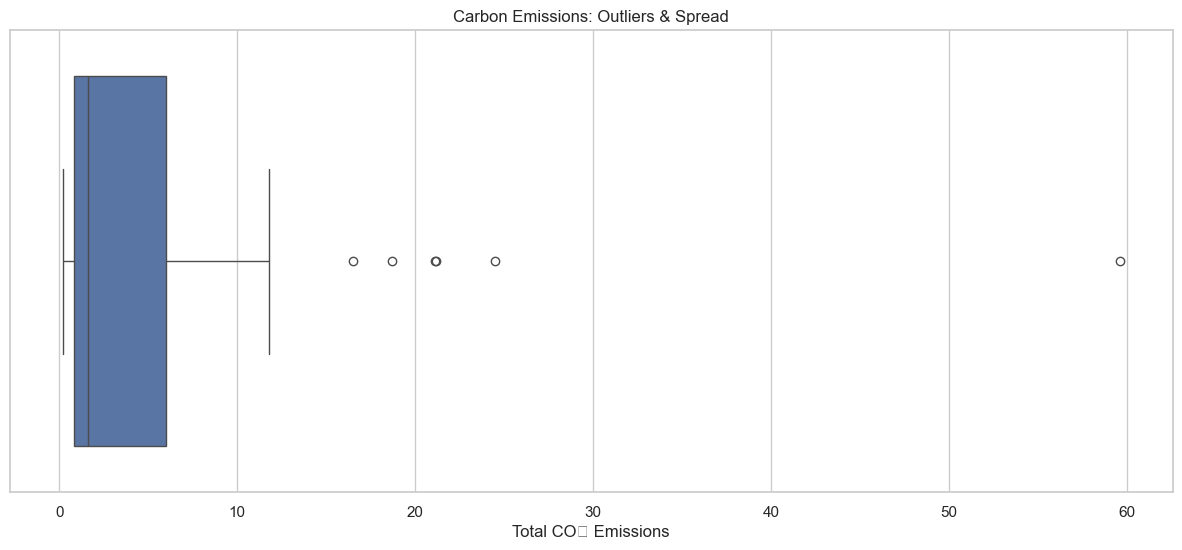

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df["Total_emissions"])
plt.title("Carbon Emissions: Outliers & Spread")
plt.xlabel("Total CO₂ Emissions")
plt.show()

* The boxplot reveals a notable number of outliers, especially beyond 10 kg CO₂ per kg. One particularly extreme outlier stands out around 60 kg CO₂ per kg, far exceeding the rest of the data.

* The interquartile range (IQR) indicates that the majority of values lie within a relatively low range, supporting the histogram’s insight that while high emission values are rare, they are nonetheless significant.

### Bivariate Analysis

Land Use vs. Carbon Emissions

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3924\1805038108.py:23: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


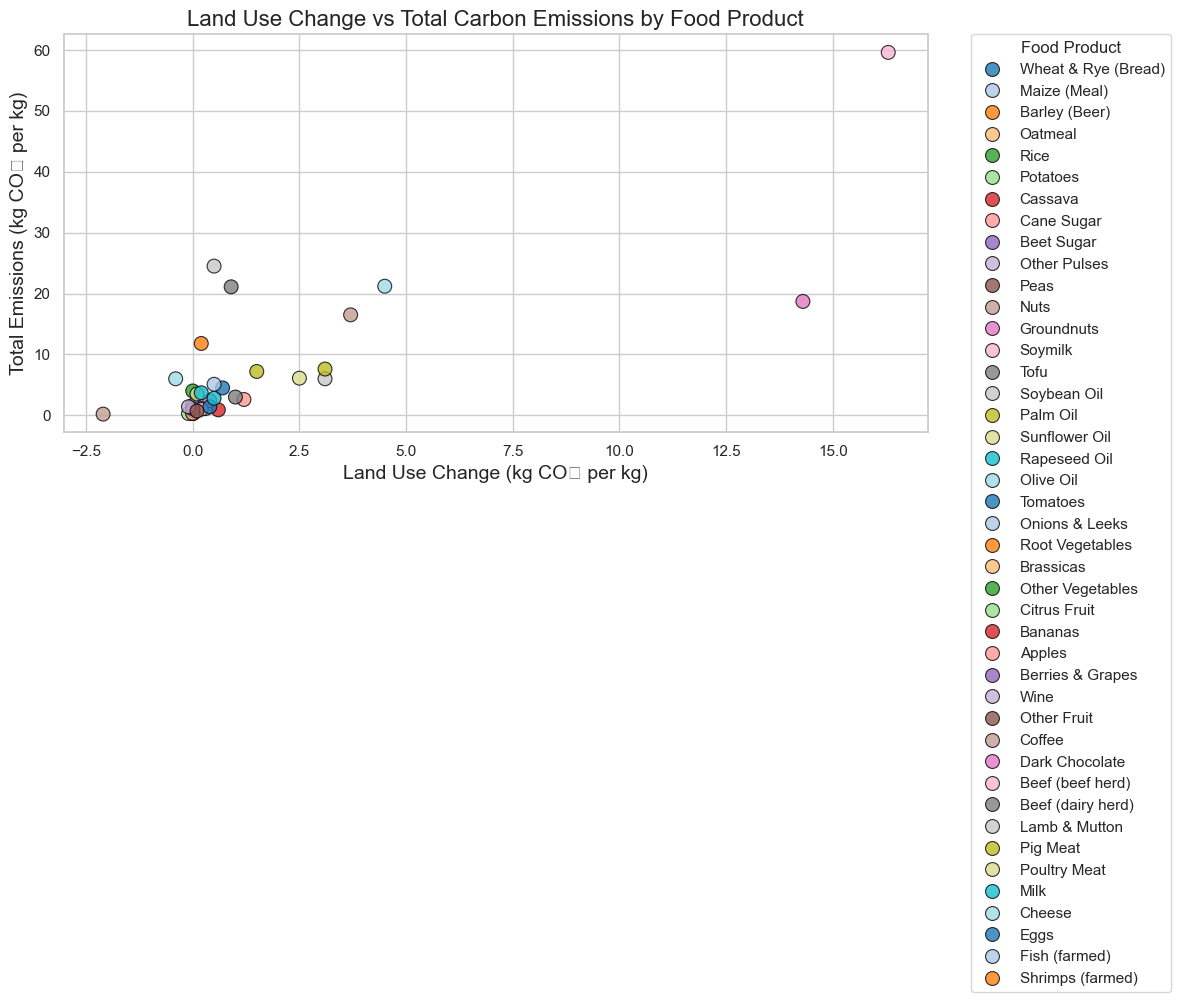

In [14]:
plt.figure(figsize=(12, 8))  # Larger figure for clarity
sns.set(style="whitegrid")  # Clean background

# Improved scatterplot
scatter = sns.scatterplot(
    data=df,
    x="Land use change",
    y="Total_emissions",
    hue="Food product",
    palette="tab20",  # Clearer color palette for many categories
    edgecolor='black',
    s=100,  # Size of markers
    alpha=0.8  # Slight transparency for overlap
)

# Title and labels
plt.title("Land Use Change vs Total Carbon Emissions by Food Product", fontsize=16)
plt.xlabel("Land Use Change (kg CO₂ per kg)", fontsize=14)
plt.ylabel("Total Emissions (kg CO₂ per kg)", fontsize=14)

# Adjust legend
plt.legend(title="Food Product", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

plt.show()

Key Observations
1. Cluster of Low Emission Foods:

Most food products (especially plant-based ones like grains, vegetables, and fruits) are clustered around the lower left corner of the graph.

These foods have both low land use change emissions and low total emissions (under ~10 kg CO₂/kg).

2. High-Emission Outliers:

Beef (beef herd) stands out dramatically with extremely high total emissions (~60 kg CO₂/kg) and high land use change emissions (~15 kg CO₂/kg). This makes it the most environmentally impactful food in the dataset.

Lamb & Mutton and Dark Chocolate also show relatively high emissions, though not as extreme as beef.

3. Moderate Emission Foods:

Foods like cheese, shrimp, and milk appear with moderate total emissions and land use change impacts.

 Insights from the Chart

Animal-based foods (e.g., beef, lamb, cheese) have the highest carbon footprint.
Plant-based foods (e.g., nuts, grains) have significantly lower emissions.
This supports the hypothesis that animal-based food production has a significantly higher environmental impact.

### Multivariate Analysis

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


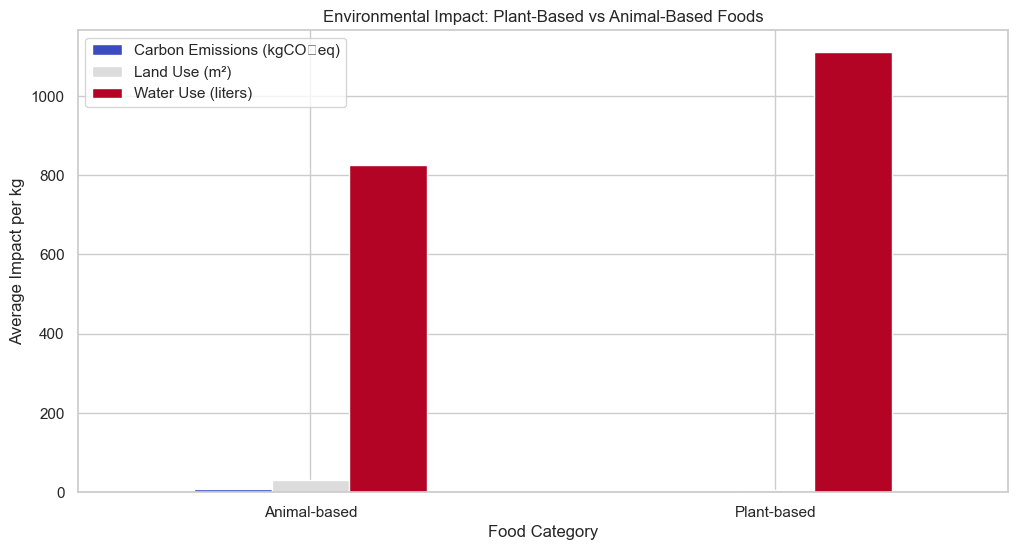

In [15]:
# Categorizing foods into Plant-based vs Animal-based
plant_based = ["Nuts", "Peas", "Tofu", "Oats", "Wheat", "Rice", "Soymilk", "Tomatoes", "Apples"]
df_cleaned["Food Category"] = df_cleaned["Food product"].apply(lambda x: "Plant-based" if x in plant_based else "Animal-based")

# Calculate mean impact per category
category_means = df_cleaned.groupby("Food Category")[["Total_emissions", "Land use per kilogram (m² per kilogram)",
                                                      "Freshwater withdrawals per kilogram (liters per kilogram)"]].mean()

# Plot comparison
category_means.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title("Environmental Impact: Plant-Based vs Animal-Based Foods")
plt.ylabel("Average Impact per kg")
plt.xticks(rotation=0)
plt.legend(["Carbon Emissions (kgCO₂eq)", "Land Use (m²)", "Water Use (liters)"])
plt.show()

Insights from the Comparison

Animal-based foods have significantly higher land use, water use, and carbon emissions than plant-based foods.
This confirms that shifting to plant-based diets could reduce the environmental footprint.

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.draw()
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Produc

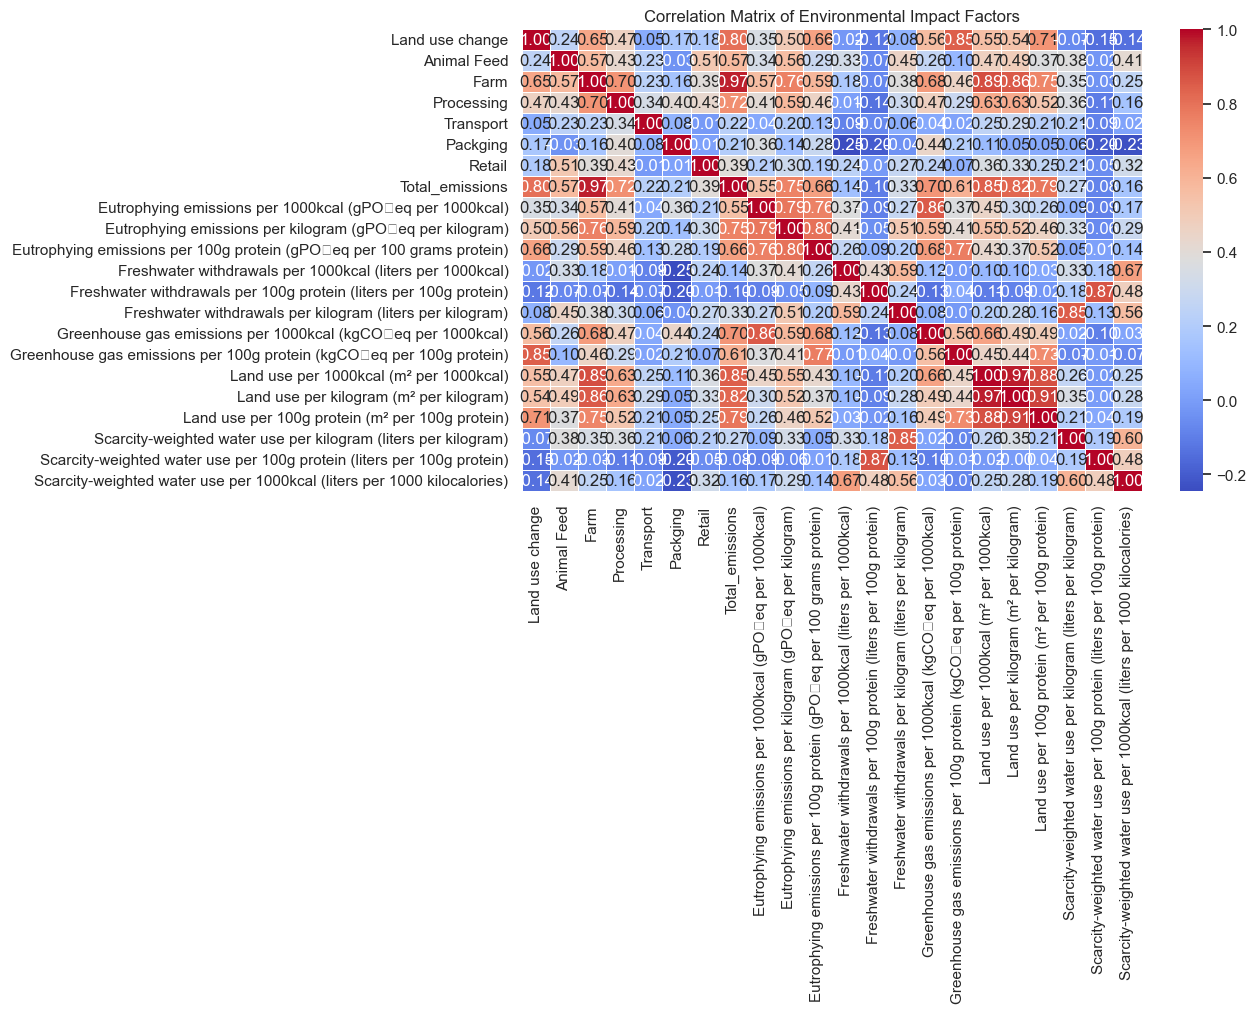

In [16]:
# Compute correlation matrix
corr_matrix = df_cleaned.select_dtypes(include=["number"]).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Environmental Impact Factors")
plt.show()

Key Findings
* Animal-based foods have a significantly larger environmental footprint than plant-based foods.
* High-emission foods (e.g., beef, lamb, cheese) also require more land and water, intensifying environmental impact.
* Shifting to plant-based diets or improving livestock farming efficiency could reduce emissions.

## Feature Engineering 

In [17]:
# Display unique food products
food_products = df["Food product"].unique()
food_products

array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [18]:
# Define plant-based and animal-based food lists
plant_based = [
    "Wheat & Rye (Bread)", "Maize (Meal)", "Barley (Beer)", "Oatmeal", "Rice", "Potatoes", "Cassava",
    "Cane Sugar", "Beet Sugar", "Soybean Oil", "Palm Oil", "Sunflower Oil", "Rapeseed Oil", "Olive Oil",
    "Other Pulses", "Peas", "Nuts", "Groundnuts", "Soymilk", "Tofu",
    "Tomatoes", "Onions & Leeks", "Root Vegetables", "Brassicas", "Other Vegetables",
    "Citrus Fruit", "Bananas", "Apples", "Berries & Grapes", "Other Fruit",
    "Wine", "Coffee", "Dark Chocolate"
]

animal_based = [
    "Beef (beef herd)", "Beef (dairy herd)", "Lamb & Mutton", "Pig Meat", "Poultry Meat",
    "Milk", "Cheese", "Eggs",
    "Fish (farmed)", "Shrimps (farmed)"
]

# Assign category to a new column
df["Category"] = df["Food product"].apply(lambda x: "Plant-Based" if x in plant_based else "Animal-Based")

# Check the result
df[["Food product", "Category"]].head(10)

,Food product,Category
0,Wheat & Rye (Bread),Plant-Based
1,Maize (Meal),Plant-Based
2,Barley (Beer),Plant-Based
3,Oatmeal,Plant-Based
4,Rice,Plant-Based
5,Potatoes,Plant-Based
6,Cassava,Plant-Based
7,Cane Sugar,Plant-Based
8,Beet Sugar,Plant-Based
9,Other Pulses,Plant-Based


In [19]:
#  need all columns that measure water consumption.

water_columns = [col for col in df.columns if "water" in col.lower() or "withdrawals" in col.lower()]
print(water_columns)

['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']


In [20]:
# also need all columns that measure land footprint

land_columns = [col for col in df.columns if "land use" in col.lower()]
print(land_columns)

['Land use change', 'Land use per 1000kcal (m² per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)']


In [21]:
df["Total Water Use"] = df[
    [
        "Freshwater withdrawals per 1000kcal (liters per 1000kcal)",
        "Freshwater withdrawals per 100g protein (liters per 100g protein)",
        "Freshwater withdrawals per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per 100g protein (liters per 100g protein)",
        "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"
    ]
].sum(axis=1)

In [22]:
df["Total Land Use"] = df[
    [
        "Land use change",
        "Land use per 1000kcal (m² per 1000kcal)",
        "Land use per kilogram (m² per kilogram)",
        "Land use per 100g protein (m² per 100g protein)"
    ]
].sum(axis=1)

In [23]:
# confirm changes made

df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,17.877558
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,18.077558
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,17.777558
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461,Plant-Based,41436.616016,16.343600
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480,Plant-Based,138877.110415,7.503293


Standardization & Scaling 

In [24]:
scaler = StandardScaler()
df[["Total_emissions", "Total Water Use", "Total Land Use"]] = scaler.fit_transform(
    df[["Total_emissions", "Total Water Use", "Total Land Use"]]
)

In [25]:
df[["Total_emissions", "Total Water Use", "Total Land Use"]].describe()

,Total_emissions,Total Water Use,Total Land Use
count,4.300000e+01,4.300000e+01,4.300000e+01
mean,-3.356488e-17,6.196594e-17,2.969201e-17
std,1.011835e+00,1.011835e+00,1.011835e+00
min,-5.561361e-01,-8.825663e-01,-4.023539e-01
25%,-4.935092e-01,-5.676334e-01,-3.423360e-01
50%,-4.212473e-01,-4.335943e-01,-3.032245e-01
75%,2.688813e-03,1.015520e-01,-2.295384e-01
max,5.167002e+00,3.536182e+00,4.485722e+00


## Hypothesis Testing 

Check normality (Shapiro-Wilk test or visualization like histograms).

Check variance equality (Levene’s test) if comparing multiple groups.

Choose the right statistical test:

If variances are equal → use parametric tests (t-test, ANOVA).

If variances are unequal → use Welch’s t-test (for two groups) or Welch’s ANOVA (for multiple groups).

### 1. Hypothesis Testing for Environmental Impact
Null Hypothesis (H₀): There is no significant difference in environmental impact(Total Emissions) between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher environmental impact(Total Emissions) than plant-based foods.

In [26]:
# Separate the groups
plant_emissions = df[df["Category"] == "Plant-Based"]["Total_emissions"]
animal_emissions = df[df["Category"] == "Animal-Based"]["Total_emissions"]

# 1️⃣ Normality Test (Shapiro-Wilk Test)
shapiro_plant = shapiro(plant_emissions)
shapiro_animal = shapiro(animal_emissions)

print(f"Shapiro Test for Plant-Based: p-value = {shapiro_plant.pvalue:.4f}")
print(f"Shapiro Test for Animal-Based: p-value = {shapiro_animal.pvalue:.4f}")

# 2️⃣ Variance Test (Levene’s Test)
levene_test = levene(plant_emissions, animal_emissions)
print(f"Levene’s Test for Equal Variance: p-value = {levene_test.pvalue:.4f}")

Shapiro Test for Plant-Based: p-value = 0.0000
Shapiro Test for Animal-Based: p-value = 0.0040
Levene’s Test for Equal Variance: p-value = 0.0018


Interpretation of the Test Results:
Shapiro-Wilk Test for Normality

Plant-Based (p = 0.0000) → The p-value is extremely low, meaning we reject the null hypothesis that the data is normally distributed.

Animal-Based (p = 0.0040) → Again, the p-value is low, so we reject the null hypothesis. The data is not normally distributed in both groups.

Levene’s Test for Equal Variances

p = 0.0018 → Since the p-value is below 0.05, we reject the null hypothesis that the variances are equal. This means that the variance in emissions between plant-based and animal-based foods is significantly different.

Since the data is not normally distributed, a non-parametric test should be used instead of a t-test.

Mann-Whitney U Test (Wilcoxon Rank-Sum Test)
This test is suitable for comparing two independent, non-normally distributed groups.

In [27]:
# Perform Mann-Whitney U test (alternative="greater" since we assume animal-based emissions > plant-based)
u_stat, p_value = mannwhitneyu(plant_emissions, animal_emissions, alternative="greater")

print(f"Mann-Whitney U Test Results: U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")

Mann-Whitney U Test Results: U-statistic = 27.0000, p-value = 1.0000


p-value = 1.0000

Decision: Fail to Reject H₀ Since p-value > 0.05, we fail to reject the null hypothesis. This means:

There is no significant difference in environmental impact (Total Emissions) between plant-based and animal-based foods.

This could mean that some plant-based foods (like; nuts, oils, other fruits) contribute heavily to emissions, balancing out the difference.

In [28]:
# Compare median emissions of both groups

print(df.groupby("Category")["Total_emissions"].median())

Category
Animal-Based    0.339911
Plant-Based    -0.440517
Name: Total_emissions, dtype: float64


Interpretation of Median Emissions

Animal-Based Median Emissions: 0.3399

Plant-Based Median Emissions: -0.4405

Even though animal-based foods have a higher median emission, the hypothesis test showed no statistically significant difference because of high variability in emissions across plant-based foods.

This suggests:

* Some plant-based foods (e.g., nuts, oils, chocolate, wine) have high emissions, balancing the difference.

* The distribution of emissions is wide, making it hard to detect a clear statistical difference.

### 2. Hypothesis Testing for Water Use
Null Hypothesis (H₀): There is no significant difference in Water Use between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher Water Use than plant-based foods.

In [29]:
# Test if animal-based foods use significantly more water than plant-based
u_stat, p_value = mannwhitneyu(df[df["Category"] == "Plant-Based"]["Total Water Use"],
                               df[df["Category"] == "Animal-Based"]["Total Water Use"],
                               alternative="greater")

print(f"Mann-Whitney U Test (Water Use): U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")

Mann-Whitney U Test (Water Use): U-statistic = 91.0000, p-value = 0.9840


Mann-Whitney U Test Results for Water Use

U-statistic = 91.0000

p-value = 0.9840 (Greater than 0.05)

Decision: Fail to reject H₀ → No significant difference in water use between plant-based and animal-based foods.

### 3. Hypothesis Testing for Land Use
Null Hypothesis (H₀): There is no significant difference in Land Use between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher land use than plant-based foods.


In [30]:
# Test if animal-based foods use significantly more land than plant-based
u_stat, p_value = mannwhitneyu(df[df["Category"] == "Plant-Based"]["Total Land Use"],
                               df[df["Category"] == "Animal-Based"]["Total Land Use"],
                               alternative="greater")

print(f"Mann-Whitney U Test (Land Use): U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")

Mann-Whitney U Test (Land Use): U-statistic = 59.0000, p-value = 0.9989


Mann-Whitney U Test Results for Land Use

U-statistic = 59.0000

p-value = 0.9989 (Greater than 0.05)

Decision: We fail to reject H₀ → No significant difference in land use between plant-based and animal-based foods.

#### Conclusion for Hypothesis Testing

In [31]:
# Create the summary table
hypothesis_results = pd.DataFrame({
    "Metric": ["Total Emissions", "Total Water Use", "Total Land Use"],
    "U-statistic": [27.0000, 91.0000, 59.0000],
    "p-value": [1.0000, 0.9840, 0.9989],
    "Result": ["No significant difference", "No significant difference", "No significant difference"]
})

# Display the table
hypothesis_results

,Metric,U-statistic,p-value,Result
0,Total Emissions,27.0,1.0000,No significant difference
1,Total Water Use,91.0,0.9840,No significant difference
2,Total Land Use,59.0,0.9989,No significant difference


In [32]:
# save df as new_fp.csv
df.to_csv("cleaned_df.csv", index=False)

### Business Analytical Questions

In [33]:
# Load the dataset
fp = pd.read_csv("cleaned_df.csv")

In [34]:
fp.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,-0.440517,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.303957
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,-0.469422,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.302492
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,-0.469422,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.304689
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,-0.421247,4.281357,...,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461,Plant-Based,-0.512000,-0.315193
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,-0.190009,9.514379,...,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480,Plant-Based,0.391336,-0.379946


In [35]:
# Rename column
fp.rename(columns={'Packging': 'Packaging'}, inplace=True)

#### 1. Which food products have the highest and lowest carbon emissions?

In [36]:
# Sort by Total Emissions (Highest to Lowest)
top_5_highest = fp.sort_values(by="Total_emissions", ascending=False).head(5)
top_5_lowest = fp.sort_values(by="Total_emissions", ascending=True).head(5)

# Display results
print("Top 5 Highest Carbon Emission Foods:\n", top_5_highest[["Food product", "Total_emissions"]])
print("\nTop 5 Lowest Carbon Emission Foods:\n", top_5_lowest[["Food product", "Total_emissions"]])

Top 5 Highest Carbon Emission Foods:
          Food product  Total_emissions
33   Beef (beef herd)         5.167002
35      Lamb & Mutton         1.785148
39             Cheese         1.467196
34  Beef (dairy herd)         1.457561
32     Dark Chocolate         1.226323

Top 5 Lowest Carbon Emission Foods:
        Food product  Total_emissions
11             Nuts        -0.556136
21   Onions & Leeks        -0.546501
25     Citrus Fruit        -0.546501
22  Root Vegetables        -0.546501
5          Potatoes        -0.546501


#### 2. What is the correlation between Land use, Water use and Emissions?

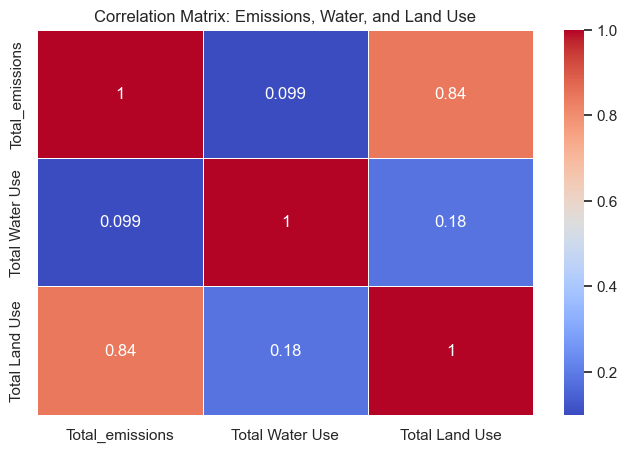

In [37]:
# Compute correlation matrix
correlation_matrix = fp[["Total_emissions", "Total Water Use", "Total Land Use"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Emissions, Water, and Land Use")
plt.show()

Strong correlation (0.84) between emissions and land use suggests that foods requiring more land also produce more greenhouse gas emissions.

Low correlation (0.099) between water use and emissions implies that water-intensive foods are not necessarily the highest contributors to emissions.

Moderate correlation (0.18) between water use and land use indicates that some land-intensive foods also require significant water resources.

#### 3. Which food production stage contributes most to Emissions?

Farm               3.469767
Land use change    1.260465
Animal Feed        0.453488
Packaging          0.269767
Processing         0.253488
Transport          0.195349
Retail             0.069767
dtype: float64


c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


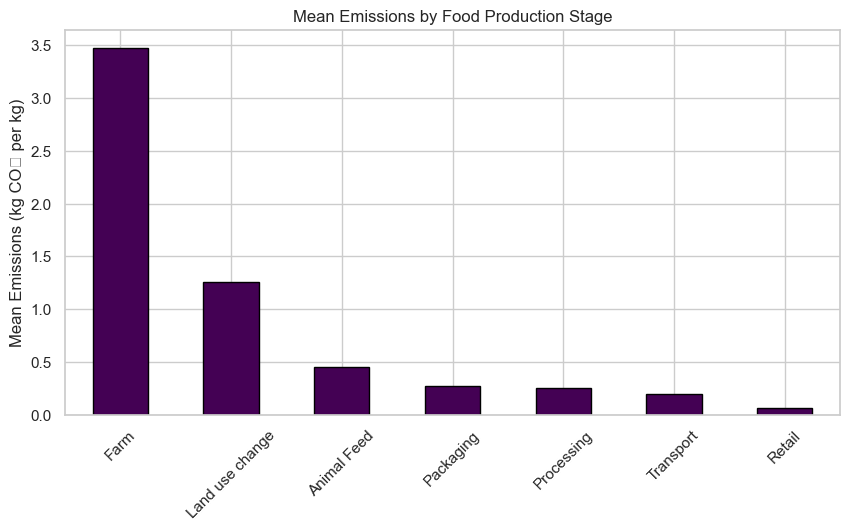

In [38]:
# Select only production stage columns
stage_columns = ["Land use change", "Animal Feed", "Farm", "Processing", "Transport", "Packaging", "Retail"]

# Compute mean emissions per stage
stage_means = fp[stage_columns].mean().sort_values(ascending=False)

# Display results
print(stage_means)

# Visualize
stage_means.plot(kind="bar", figsize=(10, 5), colormap="viridis", edgecolor="black")
plt.title("Mean Emissions by Food Production Stage")
plt.ylabel("Mean Emissions (kg CO₂ per kg)")
plt.xticks(rotation=45)
plt.show()

#### 4. How do different food types impact the environment?

In [39]:
# List all unique food products
unique_foods = fp["Food product"].unique()
unique_foods

array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [40]:
# Define mapping for food types
food_types = {
    "Wheat & Rye (Bread)": "Cereals & Grains",
    "Maize (Meal)": "Cereals & Grains",
    "Barley (Beer)": "Cereals & Grains",
    "Oatmeal": "Cereals & Grains",
    "Rice": "Cereals & Grains",

    "Potatoes": "Root & Tubers",
    "Cassava": "Root & Tubers",

    "Cane Sugar": "Sugars",
    "Beet Sugar": "Sugars",

    "Other Pulses": "Legumes & Pulses",
    "Peas": "Legumes & Pulses",
    "Soymilk": "Legumes & Pulses",
    "Tofu": "Legumes & Pulses",

    "Nuts": "Nuts & Seeds",
    "Groundnuts": "Nuts & Seeds",

    "Soybean Oil": "Vegetable Oils",
    "Palm Oil": "Vegetable Oils",
    "Sunflower Oil": "Vegetable Oils",
    "Rapeseed Oil": "Vegetable Oils",
    "Olive Oil": "Vegetable Oils",

    "Tomatoes": "Vegetables",
    "Onions & Leeks": "Vegetables",
    "Root Vegetables": "Vegetables",
    "Brassicas": "Vegetables",
    "Other Vegetables": "Vegetables",

    "Citrus Fruit": "Fruits",
    "Bananas": "Fruits",
    "Apples": "Fruits",
    "Berries & Grapes": "Fruits",
    "Other Fruit": "Fruits",

    "Wine": "Beverages & Processed",
    "Coffee": "Beverages & Processed",
    "Dark Chocolate": "Beverages & Processed",

    "Beef (beef herd)": "Meat",
    "Beef (dairy herd)": "Meat",
    "Lamb & Mutton": "Meat",
    "Pig Meat": "Meat",
    "Poultry Meat": "Meat",

    "Milk": "Dairy & Eggs",
    "Cheese": "Dairy & Eggs",
    "Eggs": "Dairy & Eggs",

    "Fish (farmed)": "Seafood",
    "Shrimps (farmed)": "Seafood"
}

# Assign new 'Food Type' column
fp["Food Type"] = fp["Food product"].map(food_types)

# Display sample rows
fp[["Food product", "Food Type"]].head(10)

,Food product,Food Type
0,Wheat & Rye (Bread),Cereals & Grains
1,Maize (Meal),Cereals & Grains
2,Barley (Beer),Cereals & Grains
3,Oatmeal,Cereals & Grains
4,Rice,Cereals & Grains
5,Potatoes,Root & Tubers
6,Cassava,Root & Tubers
7,Cane Sugar,Sugars
8,Beet Sugar,Sugars
9,Other Pulses,Legumes & Pulses


                       Total_emissions  Total Water Use  Total Land Use
Food Type                                                              
Beverages & Processed         0.600053        -0.746091        0.390503
Cereals & Grains             -0.398124        -0.284289       -0.321255
Dairy & Eggs                  0.339911         0.598156        0.110049
Fruits                       -0.513742         0.786213       -0.273827
Legumes & Pulses             -0.421247        -0.464076       -0.305016
Meat                          1.708068         0.455886        1.681206
Nuts & Seeds                 -0.450152         1.487904       -0.305023
Root & Tubers                -0.517596        -0.626603       -0.319035
Seafood                       0.238744        -0.245843       -0.305720
Sugars                       -0.382708        -0.532746       -0.354168
Vegetable Oils               -0.058975        -0.169512       -0.255086
Vegetables                   -0.519523        -0.361361       -0

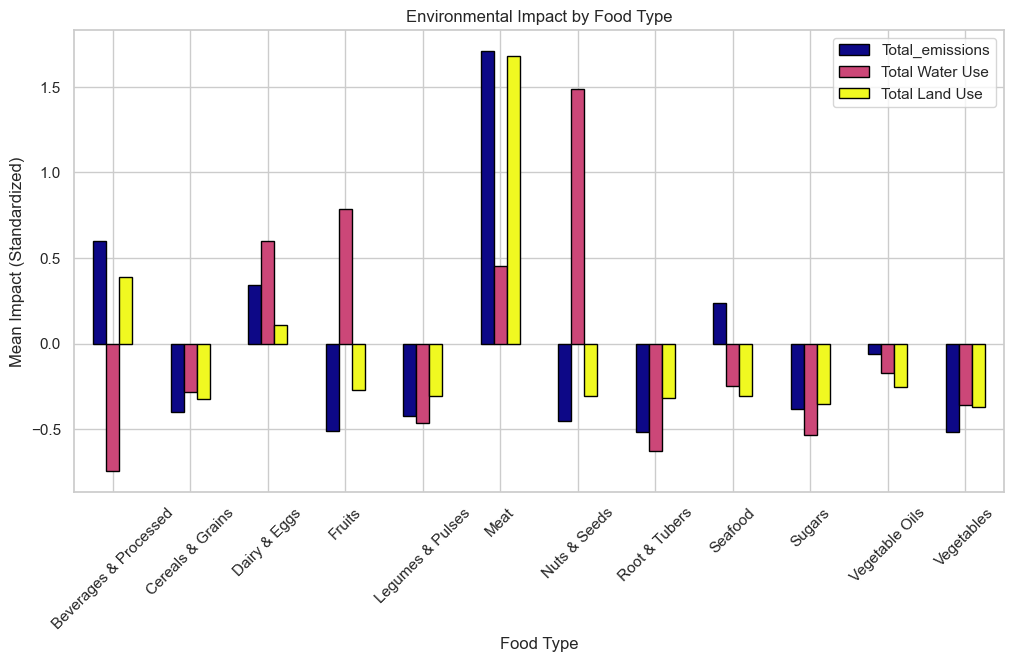

In [41]:
# Group by food type and calculate mean impact
food_type_means = fp.groupby("Food Type")[["Total_emissions", "Total Water Use", "Total Land Use"]].mean()

# Display results
print(food_type_means)

# Visualize
food_type_means.plot(kind="bar", figsize=(12, 6), colormap="plasma", edgecolor="black")
plt.title("Environmental Impact by Food Type")
plt.ylabel("Mean Impact (Standardized)")
plt.xticks(rotation=45)
plt.show()

* Meat, nuts & seeds, and dairy & eggs have the highest environmental impact across all three categories (emissions, water use, and land use).

* Legumes, vegetables, and cereals have lower environmental impacts, reinforcing their sustainability.

* Water use is particularly high for nuts & seeds, likely due to irrigation requirements.

* Beverages & processed foods show a negative impact for water use, suggesting they may have a lower overall water footprint.

#### 5. How do Plant-Based vs. Animal-Based foods compare in environmental impact?

              Total_emissions  Total Water Use  Total Land Use
Category                                                      
Animal-Based         1.003756         0.358221        0.812474
Plant-Based         -0.304169        -0.108552       -0.246204


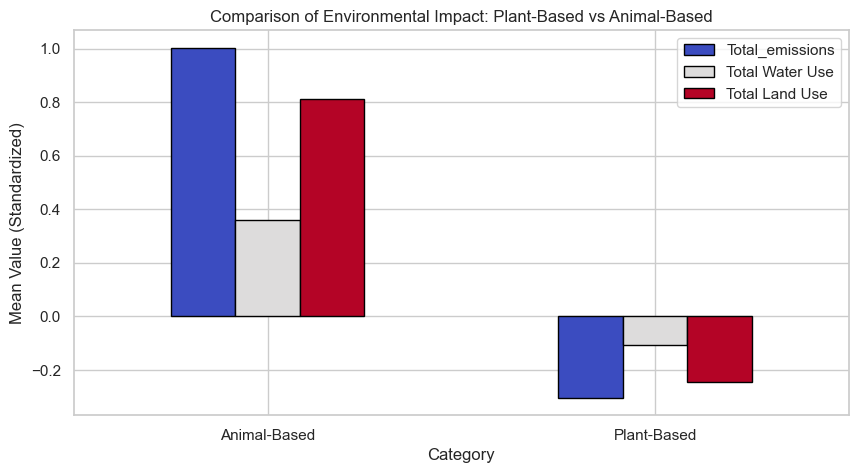

In [42]:
# Group by Category and calculate mean emissions, water, and land use
category_means = fp.groupby("Category")[["Total_emissions", "Total Water Use", "Total Land Use"]].mean()

# Display results
print(category_means)

# Visualize
category_means.plot(kind="bar", figsize=(10, 5), colormap="coolwarm", edgecolor="black")
plt.title("Comparison of Environmental Impact: Plant-Based vs Animal-Based")
plt.ylabel("Mean Value (Standardized)")
plt.xticks(rotation=0)
plt.show()

#### 6. Can we group foods based on their environmental impact using Clustering?

In [43]:
print(fp.columns)

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packaging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein

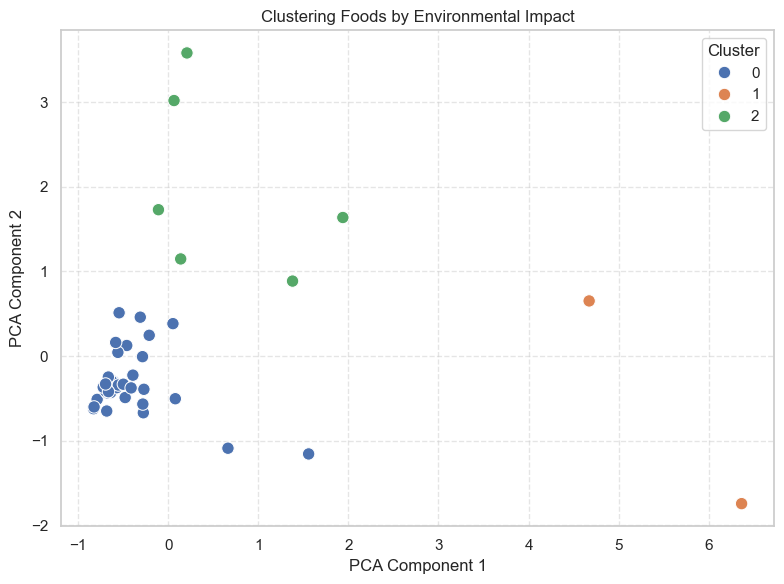

In [44]:
# Select relevant features
X = fp[["Total_emissions", "Total Water Use", "Total Land Use"]]

# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
fp["Cluster"] = kmeans.fit_predict(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
fp["PCA1"] = X_pca[:, 0]
fp["PCA2"] = X_pca[:, 1]

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fp, x="PCA1", y="PCA2", hue="Cluster", palette="deep", s=80)
plt.title("Clustering Foods by Environmental Impact")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Key Insights;**

This plot represents food items clustered based on their environmental impact using Principal Component Analysis (PCA) for dimensionality reduction.

Three Distinct Clusters:

* Cluster 0 (Blue): The largest cluster, containing the majority of food items with low environmental impact.

* Cluster 1 (Orange): A small group of outliers with extremely high environmental impact, likely representing foods like beef and dairy.

* Cluster 2 (Green): Intermediate-impact foods, possibly representing nuts, seeds, and certain fish products.

Separation in PCA Space:

* Cluster 1 (orange points) is far apart from the others, showing that these food items have a significantly different impact.

* Cluster 2 (green points) is more spread out but still separate from the low-impact group.

* Cluster 0 (blue points) is tightly packed, indicating similar characteristics among the foods in this group.

**Key Takeaways:**

1. Low-impact foods dominate the dataset, reinforcing the sustainability of plant-based diets.

2. High-impact foods form a clear separate group, emphasizing the outsized impact of certain animal-based products.

3. Intermediate foods have mixed impact levels, possibly reflecting factors like water use or emissions differences.

#### 7. What are the top five contributors to Eutrophication?

In [1]:
# Sort foods by Eutrophying Emissions (TOP 5)
top_eutrophying = df.sort_values(by="Eutrophying emissions per kilogram (gPO₄eq per kilogram)", ascending=False).head(5)

# Display the top 5 contributors
print(top_eutrophying[["Food product", "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]])

NameError: name 'df' is not defined

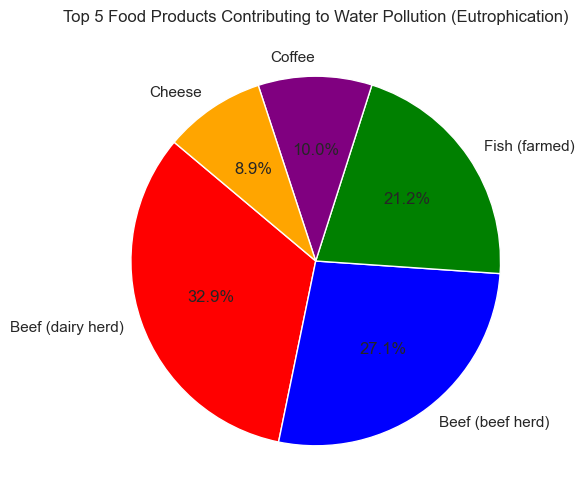

In [ ]:
# Pie chart for top eutrophying foods 
plt.figure(figsize=(8, 6))
plt.pie(top_eutrophying["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"],
        labels=top_eutrophying["Food product"],
        autopct="%1.1f%%", startangle=140, colors=["red", "blue", "green", "purple", "orange"])

plt.title("Top 5 Food Products Contributing to Water Pollution (Eutrophication)")
plt.show()

In [ ]:
fp.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use,Food Type,Cluster,PCA1,PCA2
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,-0.440517,7.000000,...,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.303957,Cereals & Grains,0,-0.607380,-0.301029
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,-0.469422,7.000000,...,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.302492,Cereals & Grains,0,-0.626163,-0.295320
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,-0.469422,7.000000,...,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.304689,Cereals & Grains,0,-0.627691,-0.295090
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,-0.421247,4.281357,...,18786.20,14450.923080,7162.104461,Plant-Based,-0.512000,-0.315193,Cereals & Grains,0,-0.619034,-0.380099
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,-0.190009,9.514379,...,49576.30,69825.774650,13449.891480,Plant-Based,0.391336,-0.379946,Cereals & Grains,0,-0.309270,0.459276


In [ ]:
# save fp as new_fp.csv
fp.to_csv("new_fp.csv", index=False)

## Further Analysis 

In [49]:
# Load the dataset
fpn = pd.read_csv("new_fp.csv")

# Display basic info
print(fpn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 30 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packaging                                                                43 

#### Principle Component Analysis

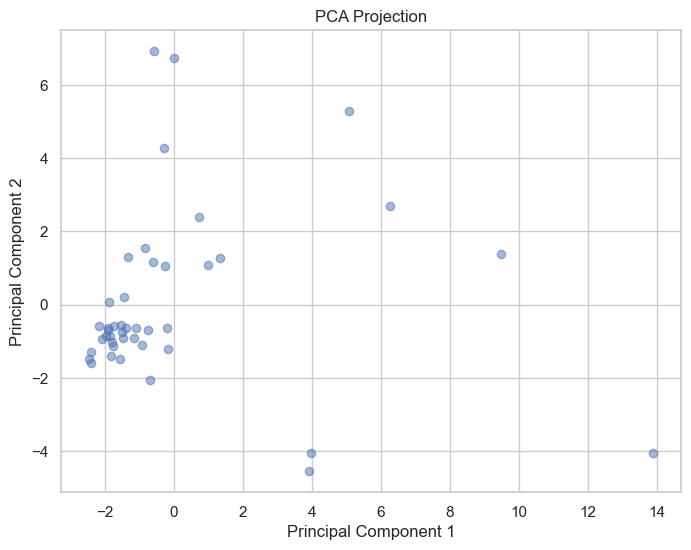

                                              Feature         VIF
0                                     Land use change         inf
1                                         Animal Feed         inf
2                                                Farm         inf
3                                          Processing         inf
4                                           Transport         inf
5                                           Packaging         inf
6                                              Retail         inf
7                                     Total_emissions         inf
8   Eutrophying emissions per 1000kcal (gPO₄eq per...  157.052165
9   Eutrophying emissions per kilogram (gPO₄eq per...   45.480425
10  Eutrophying emissions per 100g protein (gPO₄eq...   51.804047
11  Freshwater withdrawals per 1000kcal (liters pe...         inf
12  Freshwater withdrawals per 100g protein (liter...         inf
13  Freshwater withdrawals per kilogram (liters pe...         inf
14  Greenh

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [50]:
# Standardize data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fpn.select_dtypes(include=['float64', 'int64']))

# PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_results = pca.fit_transform(scaled_data)

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

# VIF to check multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = fpn.select_dtypes(include=['float64', 'int64']).columns
vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]
print(vif_data)

* The Principal Component Analysis (PCA) scatter plot shows the variance captured by the first two principal components.

* The clustering of points around the origin suggests that most data points are similar with little deviation.

* A few outliers (points far from the center) indicate some observations significantly differ from the rest.

* The spread along PC1 is higher than PC2, meaning that Principal Component 1 captures most of the variance in the dataset.

                                                    count          mean  \
Land use change                                      43.0  1.260465e+00   
Animal Feed                                          43.0  4.534884e-01   
Farm                                                 43.0  3.469767e+00   
Processing                                           43.0  2.534884e-01   
Transport                                            43.0  1.953488e-01   
Packaging                                            43.0  2.697674e-01   
Retail                                               43.0  6.976744e-02   
Total_emissions                                      43.0 -3.356488e-17   
Eutrophying emissions per 1000kcal (gPO₄eq per ...   43.0  2.248816e+01   
Eutrophying emissions per kilogram (gPO₄eq per ...   43.0  4.210860e+01   
Eutrophying emissions per 100g protein (gPO₄eq ...   43.0  4.702735e+01   
Freshwater withdrawals per 1000kcal (liters per...   43.0  4.539638e+02   
Freshwater withdrawals pe

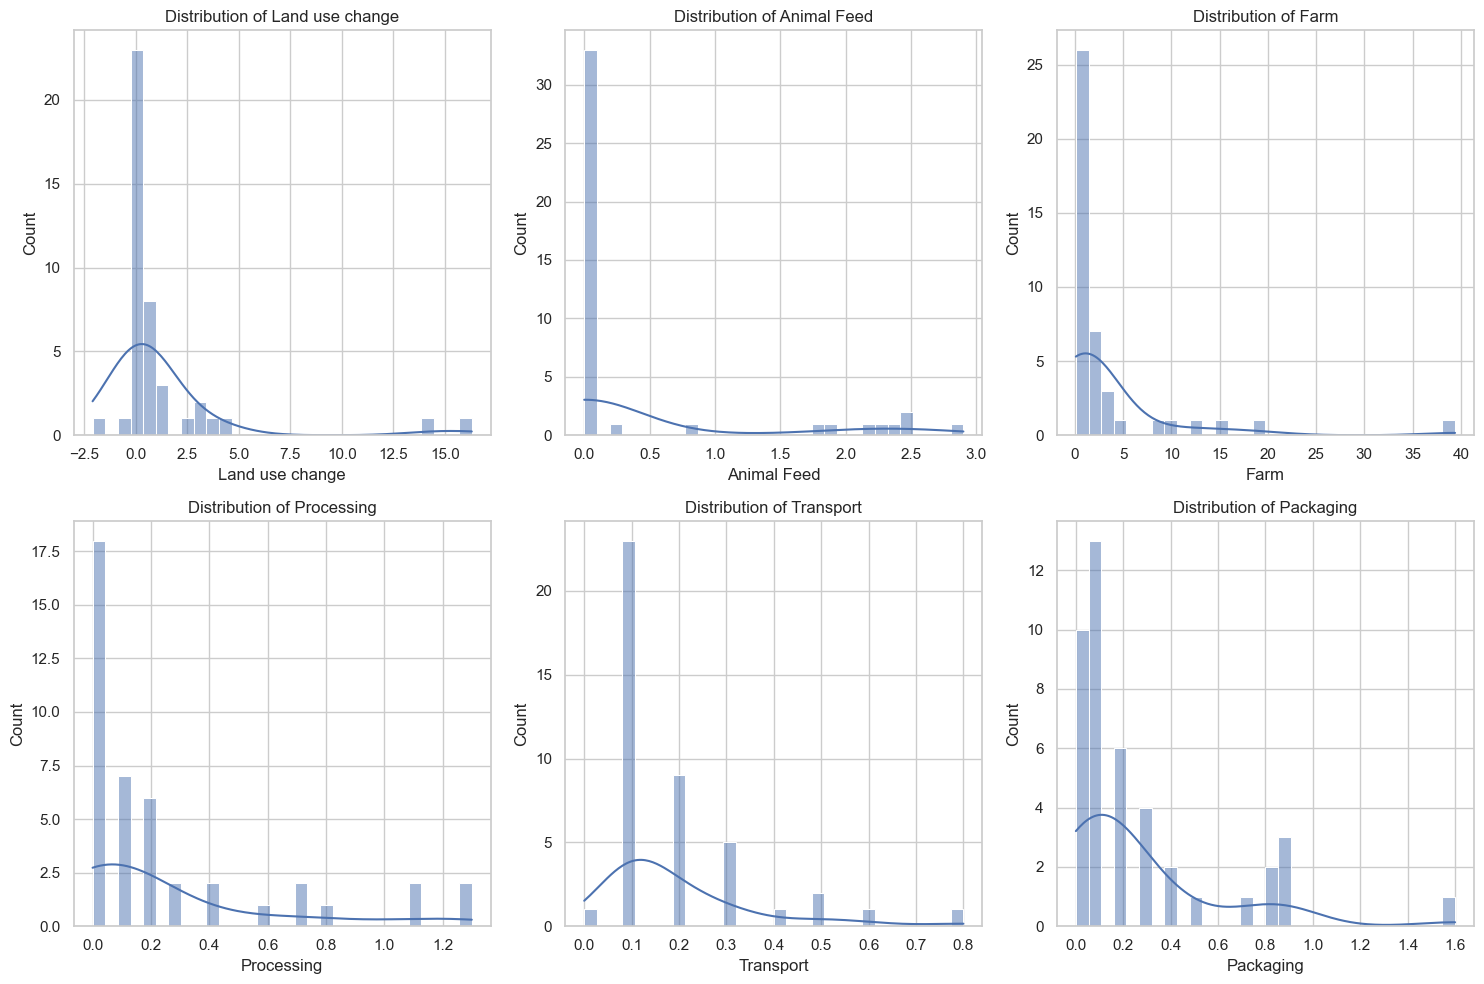

In [51]:
# Distribution of Features 

# Set visualization style
sns.set_style("whitegrid")

# Summary statistics with skewness and kurtosis
univariate_stats = fpn.describe().T
univariate_stats['Skewness'] = fpn.skew(numeric_only=True)  # Apply to numeric columns only
univariate_stats['Kurtosis'] = fpn.kurt(numeric_only=True)  # Apply to numeric columns only
print(univariate_stats)

# Histogram and KDE for numerical variables
num_cols = fpn.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:6]):  # Plot first 6 numerical variables
    plt.subplot(2, 3, i + 1)
    sns.histplot(fp[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

#### Correlation between Total Land use, Total Water use and Total Emissions

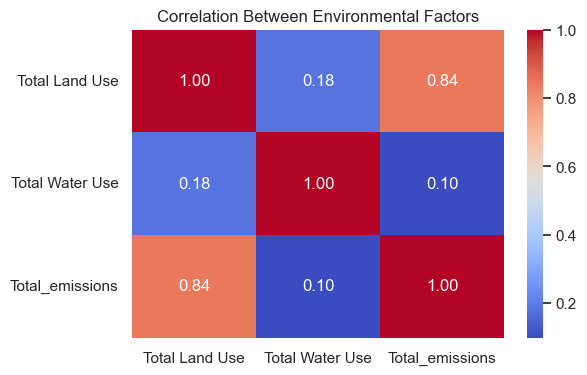

In [52]:
# Select relevant columns for correlation analysis
env_factors = ["Total Land Use", "Total Water Use", "Total_emissions"]
corr_matrix = fpn[env_factors].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Environmental Factors")
plt.show()

Insights

The heatmap shows the correlation between Total Land Use, Total Water Use, and Total Emissions.

Strong positive correlation between Total Land Use and Total Emissions → Products that require more land also tend to have higher emissions.

Moderate correlation between Total Water Use and Total Emissions → Water-intensive products may also contribute to higher emissions, but the relationship is weaker.

Weak correlation between Total Land Use and Total Water Use → Some products may use significant land but not necessarily high water and vice versa.

**Cluster Analysis Summary**
* Average Environmental Impact: Examines the mean carbon emissions, land use, and water use within each cluster.

* Impact Level Distinctions: Identifies whether clusters correspond to high-impact or low-impact food groups based on environmental indicators.

* Dominant Food Categories: Highlights which food types or categories are most prevalent in each cluster, offering insight into shared characteristics and environmental performance.

#### Plant-Based vs. Animal-Based across Emissions, Land use, and Water use

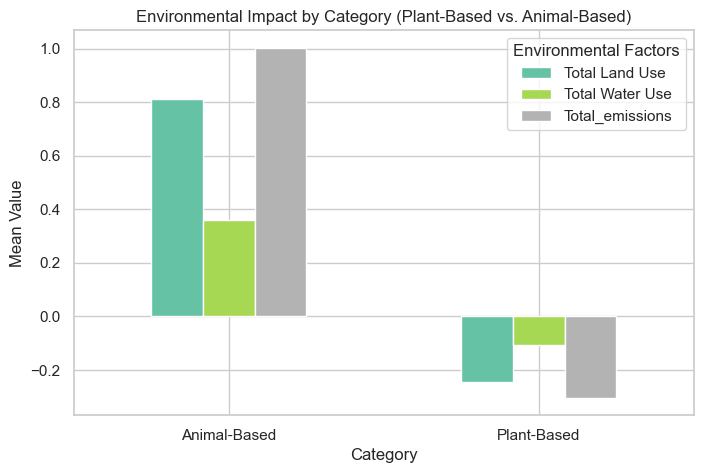

In [53]:
# Compare emissions, land use, and water use between Plant-Based and Animal-Based categories
category_summary = fpn.groupby("Category")[["Total Land Use", "Total Water Use", "Total_emissions"]].mean()

# Plot comparison
category_summary.plot(kind="bar", figsize=(8, 5), colormap="Set2")
plt.title("Environmental Impact by Category (Plant-Based vs. Animal-Based)")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Environmental Factors")
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_3924\2688807698.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fpn, x="Category", y="Total_emissions", ax=axes[0], palette="Set2")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3924\2688807698.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fpn, x="Category", y="Total Land Use", ax=axes[1], palette="Set1")
C:\Users\lenovo\AppData\Local\Temp\ipykernel_3924\2688807698.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fpn, x="Category", y="Total Water Use", ax=axes[2], palet

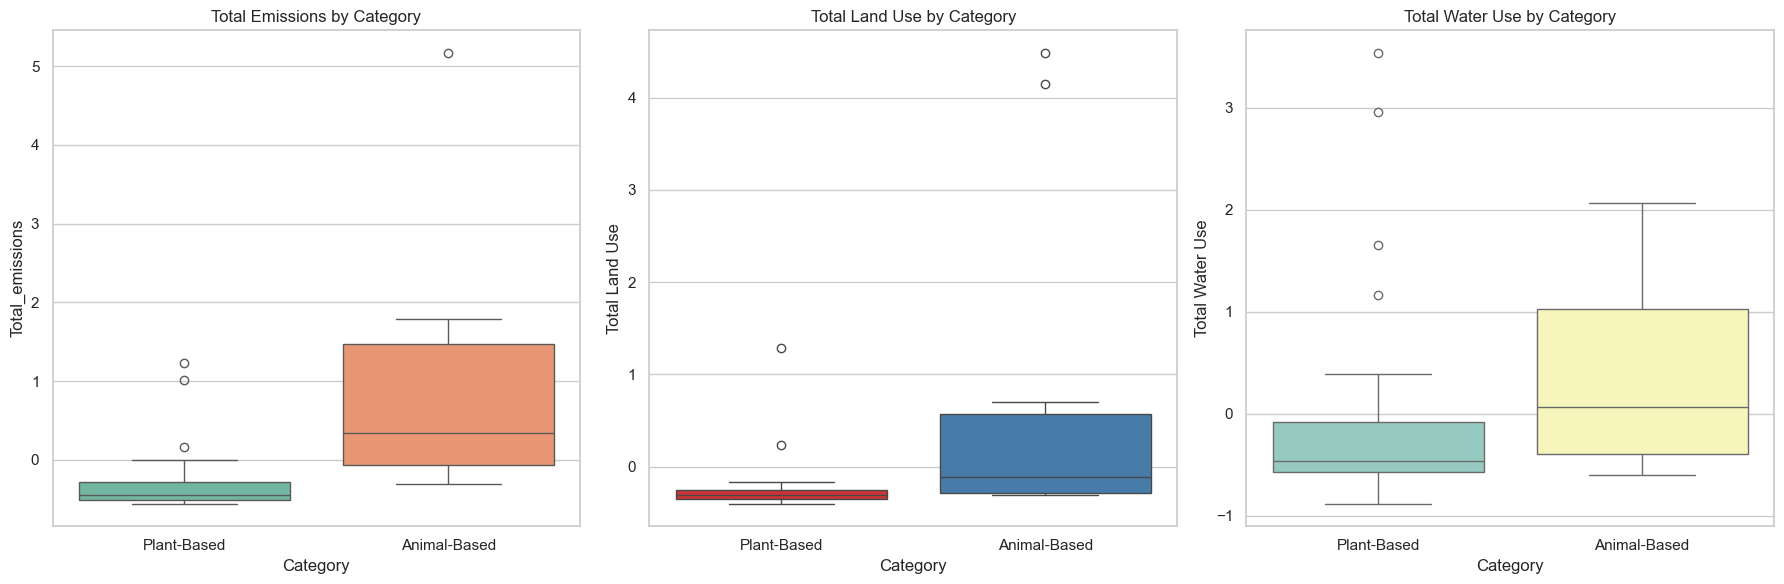

In [54]:
# Grouped boxplots to compare emissions and resource use across Categories
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Total Emissions by Category
sns.boxplot(data=fpn, x="Category", y="Total_emissions", ax=axes[0], palette="Set2")
axes[0].set_title("Total Emissions by Category")

# Total Land Use by Category
sns.boxplot(data=fpn, x="Category", y="Total Land Use", ax=axes[1], palette="Set1")
axes[1].set_title("Total Land Use by Category")

# Total Water Use by Category
sns.boxplot(data=fpn, x="Category", y="Total Water Use", ax=axes[2], palette="Set3")
axes[2].set_title("Total Water Use by Category")

plt.tight_layout()
plt.show()

Insights

Emissions: Animal-based products generally have higher emissions than plant-based ones.

Land Use: Animal-based products tend to require significantly more land.

Water Use: There is a wider range of water use across both categories, but some animal-based products show extreme values.

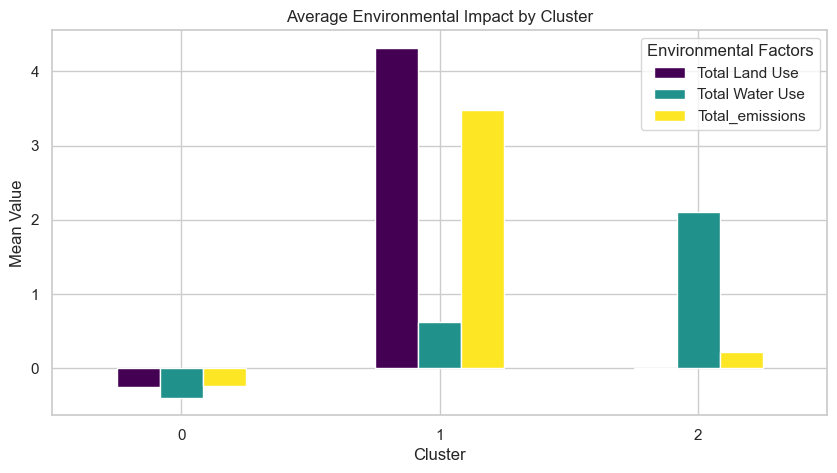

In [55]:
# Compare emissions, land use, and water use across clusters
cluster_summary = fpn.groupby("Cluster")[["Total Land Use", "Total Water Use", "Total_emissions"]].mean()

# Plot cluster characteristics
cluster_summary.plot(kind="bar", figsize=(10, 5), colormap="viridis")
plt.title("Average Environmental Impact by Cluster")
plt.ylabel("Mean Value")
plt.xticks(rotation=0)
plt.legend(title="Environmental Factors")
plt.show()

### Dominant Food Types in each Cluster

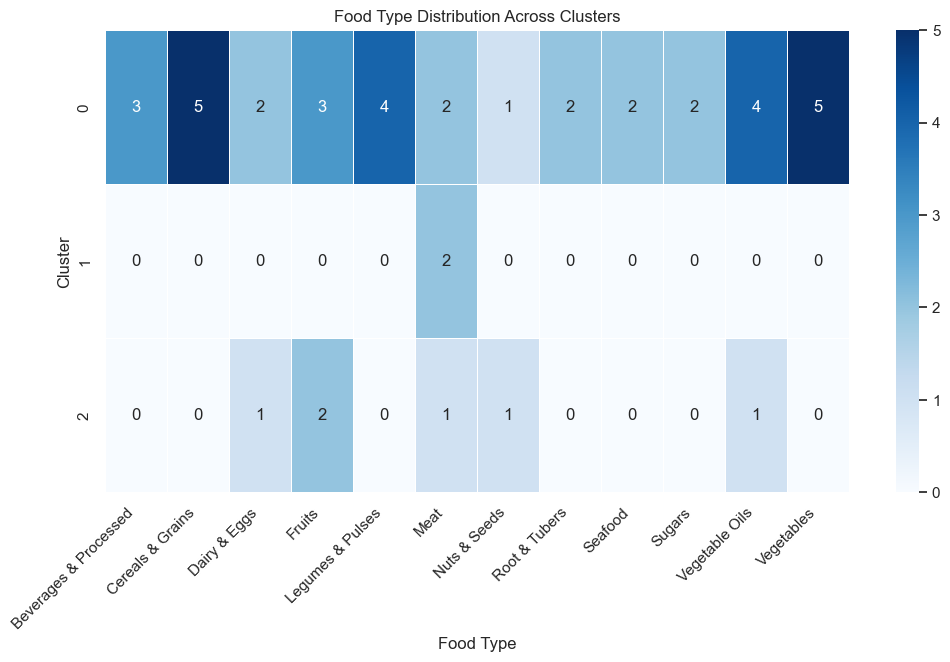

In [56]:
# Count food types in each cluster
food_type_distribution = fpn.groupby(["Cluster", "Food Type"]).size().unstack().fillna(0)

# Plot heatmap to show food type dominance in clusters
plt.figure(figsize=(12, 6))
sns.heatmap(food_type_distribution, cmap="Blues", annot=True, fmt=".0f", linewidths=0.5)
plt.title("Food Type Distribution Across Clusters")
plt.xlabel("Food Type")
plt.ylabel("Cluster")
plt.xticks(rotation=45, ha="right")
plt.show()

**Key insights:**

Certain clusters are dominated by specific food types

1. Some clusters contain mostly Meat & Dairy, likely corresponding to higher emissions and land use.

2. Others are primarily Cereals, Vegetables, or Nuts, which may have high water use but lower emissions.

Clusters reflect environmental impact patterns

1. If a cluster has high emissions, it is likely associated with animal-based products.

2. If a cluster has high water use, it may be dominated by crops like rice or nuts.



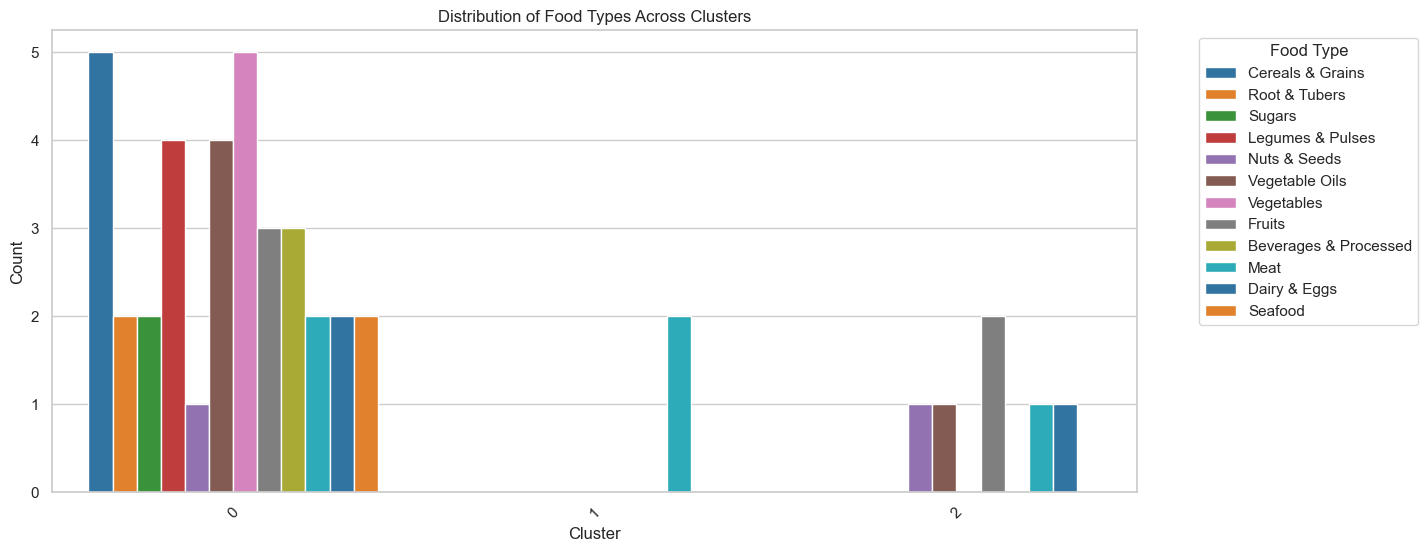

In [57]:
# Countplot to see distribution of Food Types across Clusters
plt.figure(figsize=(14, 6))
sns.countplot(data=fpn, x="Cluster", hue="Food Type", palette="tab10")
plt.title("Distribution of Food Types Across Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="Food Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

**Key insights:**

* Some clusters are dominated by specific food types.

* There is a clear separation between plant-based and animal-based products in certain clusters.

* Some clusters have a diverse mix of food types, while others are more specialized.

#### Top 10 Food Products by Land Use

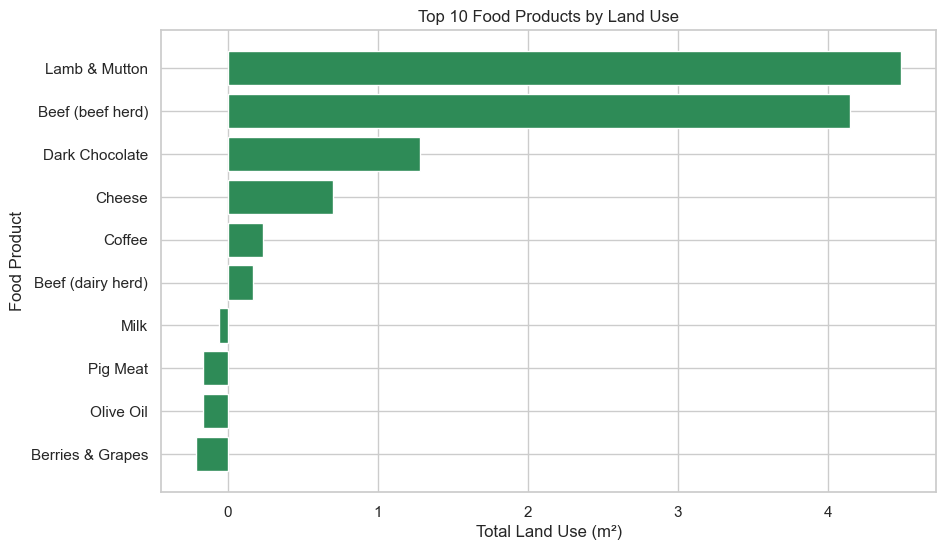

In [58]:
# Sorting for top 10 food products by land use
top_10_land_use = fpn.nlargest(10, 'Total Land Use')

# Visualization: Top 10 Food Products by Land Use
plt.figure(figsize=(10, 6))
plt.barh(top_10_land_use['Food product'], top_10_land_use['Total Land Use'], color='seagreen')
plt.xlabel("Total Land Use (m²)")
plt.ylabel("Food Product")
plt.title("Top 10 Food Products by Land Use")
plt.gca().invert_yaxis()
plt.show()

#### Top 10 Food Products by Water Use

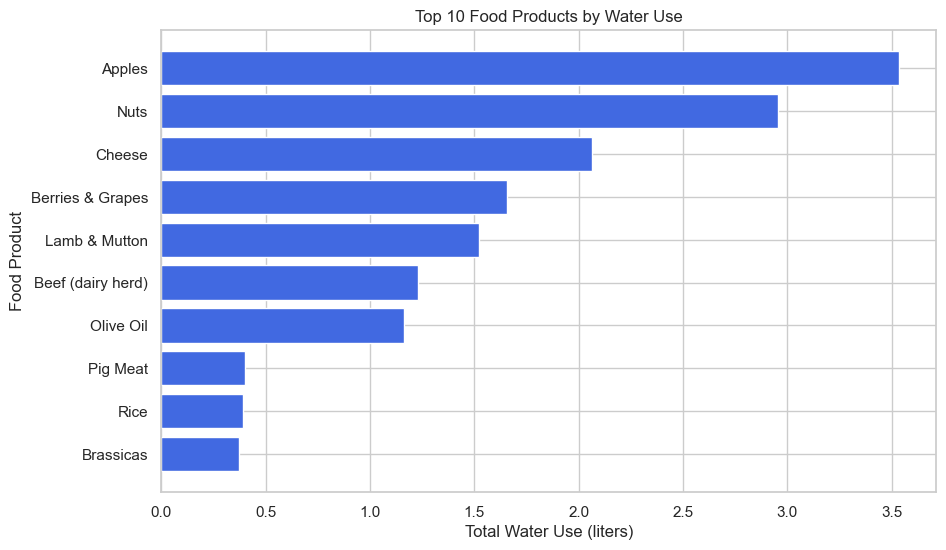

In [59]:
# Sorting for top 10 food products by water use
top_10_water_use = fpn.nlargest(10, 'Total Water Use')

# Visualization: Top 10 Food Products by Water Use
plt.figure(figsize=(10, 6))
plt.barh(top_10_water_use['Food product'], top_10_water_use['Total Water Use'], color='royalblue')
plt.xlabel("Total Water Use (liters)")
plt.ylabel("Food Product")
plt.title("Top 10 Food Products by Water Use")
plt.gca().invert_yaxis()
plt.show()

#### Top 10 Food Types by Emissions

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


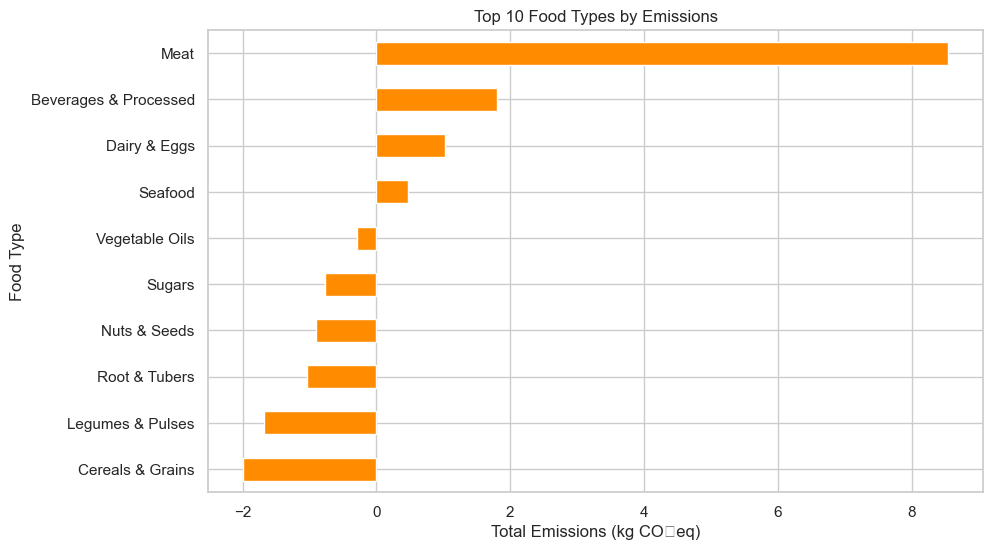

In [60]:
# Aggregating emissions by food type
top_10_food_type_emissions = fpn.groupby('Food Type')['Total_emissions'].sum().nlargest(10)

# Visualization: Top 10 Food Types by Emissions
plt.figure(figsize=(10, 6))
top_10_food_type_emissions.sort_values().plot(kind='barh', color='darkorange')
plt.xlabel("Total Emissions (kg CO₂eq)")
plt.ylabel("Food Type")
plt.title("Top 10 Food Types by Emissions")
plt.show()

#### Top 10 Food Types by Land Use

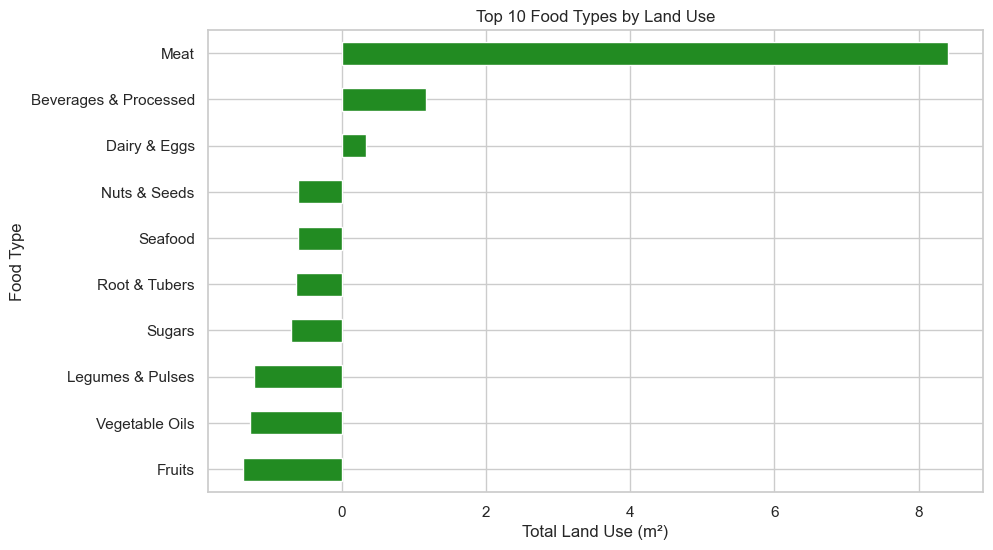

In [61]:
# Aggregating land use by food type
top_10_food_type_land_use = fpn.groupby('Food Type')['Total Land Use'].sum().nlargest(10)

# Visualization: Top 10 Food Types by Land Use
plt.figure(figsize=(10, 6))
top_10_food_type_land_use.sort_values().plot(kind='barh', color='forestgreen')
plt.xlabel("Total Land Use (m²)")
plt.ylabel("Food Type")
plt.title("Top 10 Food Types by Land Use")
plt.show()

#### Top 10 Food Types by Water Use

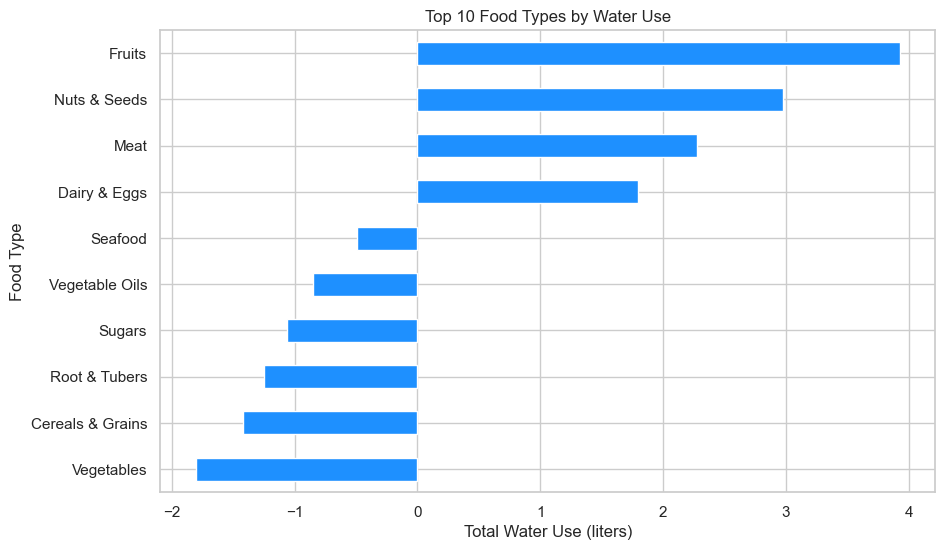

In [62]:
# Aggregating water use by food type
top_10_food_type_water_use = fpn.groupby('Food Type')['Total Water Use'].sum().nlargest(10)

# Visualization: Top 10 Food Types by Water Use
plt.figure(figsize=(10, 6))
top_10_food_type_water_use.sort_values().plot(kind='barh', color='dodgerblue')
plt.xlabel("Total Water Use (liters)")
plt.ylabel("Food Type")
plt.title("Top 10 Food Types by Water Use")
plt.show()

#### Foods with High Eutrophication Emissions

c:\Users\lenovo\Documents\Documents\personal\Azubi Africa\Talent Mobility Program\TMP 3\TMP3---Environment-Impact-of-Food-Production-Analysis-\venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


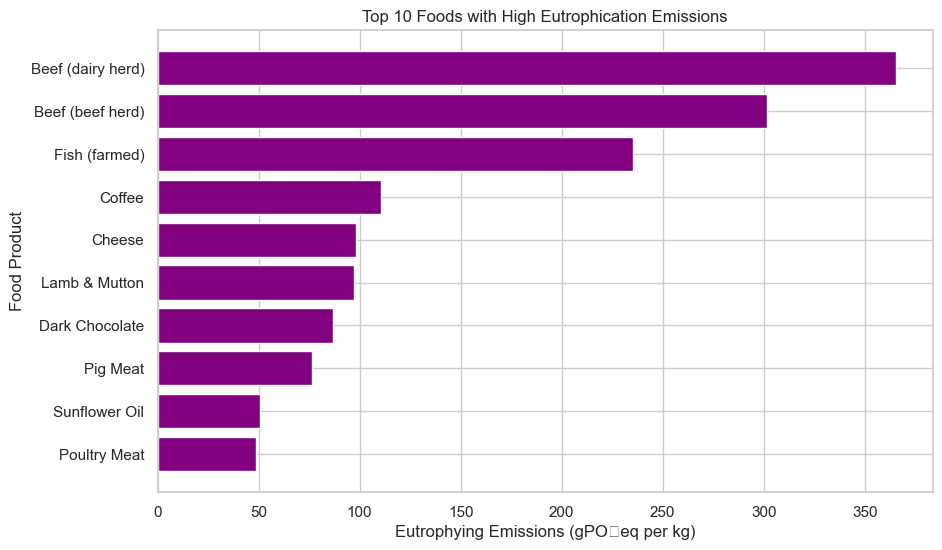

In [63]:
# Sorting for top food products by eutrophication emissions
top_eutrophication = fpn.nlargest(10, 'Eutrophying emissions per kilogram (gPO₄eq per kilogram)')

# Visualization: Foods with High Eutrophication Emissions
plt.figure(figsize=(10, 6))
plt.barh(top_eutrophication['Food product'], top_eutrophication['Eutrophying emissions per kilogram (gPO₄eq per kilogram)'], color='purple')
plt.xlabel("Eutrophying Emissions (gPO₄eq per kg)")
plt.ylabel("Food Product")
plt.title("Top 10 Foods with High Eutrophication Emissions")
plt.gca().invert_yaxis()
plt.show()